<a href="https://colab.research.google.com/github/MathalinAK/machinelearning/blob/main/mltask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
(df["class"].value_counts())

class
g    12332
h     6688
Name: count, dtype: int64

In [ ]:
df["class"] = df["class"].apply(str)


In [ ]:
df["class"] = df["class"].apply(str)  # Convert all values to strings


In [ ]:
df["class"]=(df["class"] == "g").astype(int)


In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

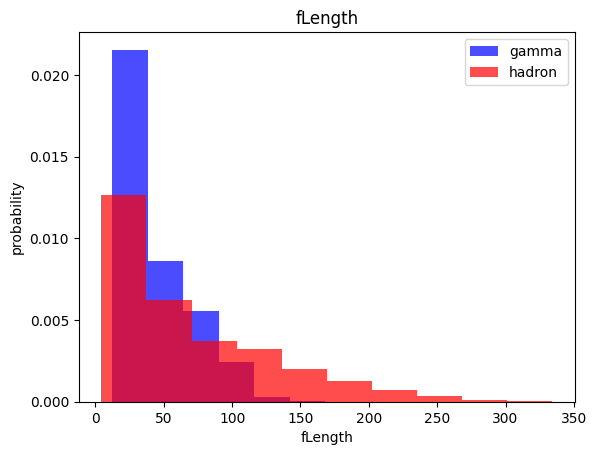

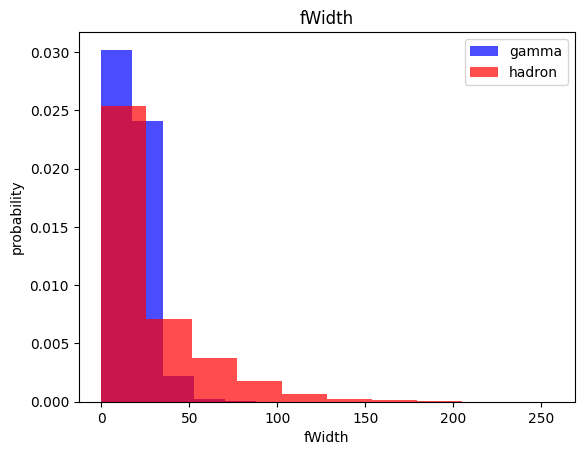

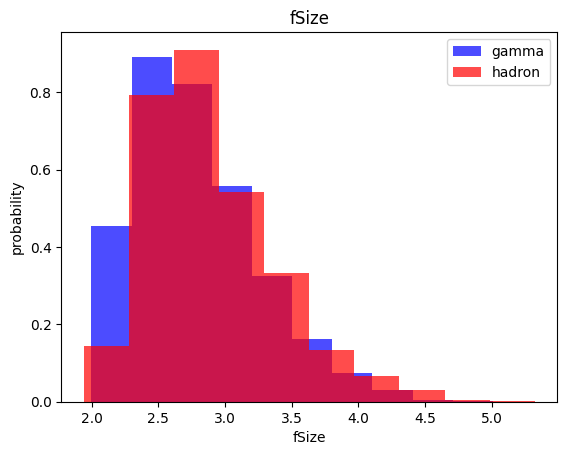

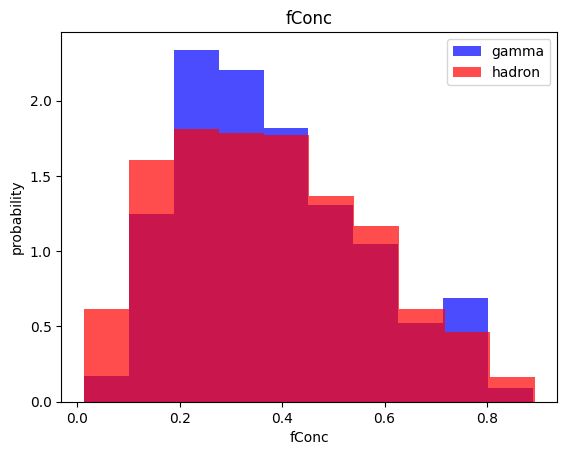

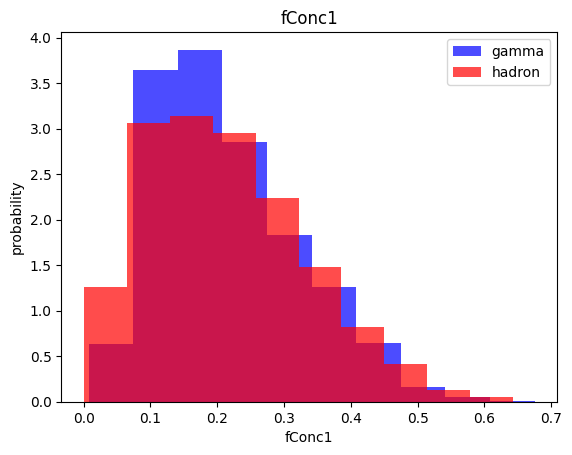

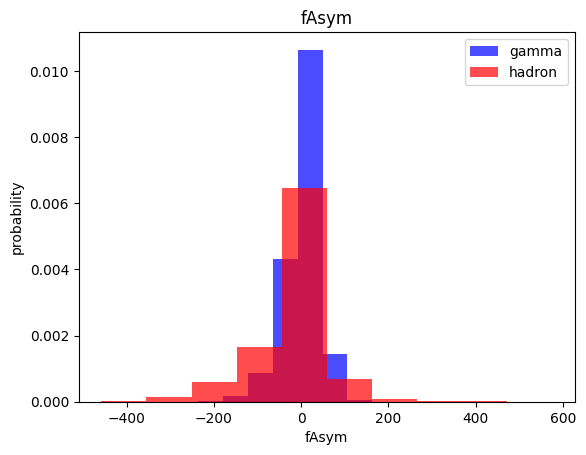

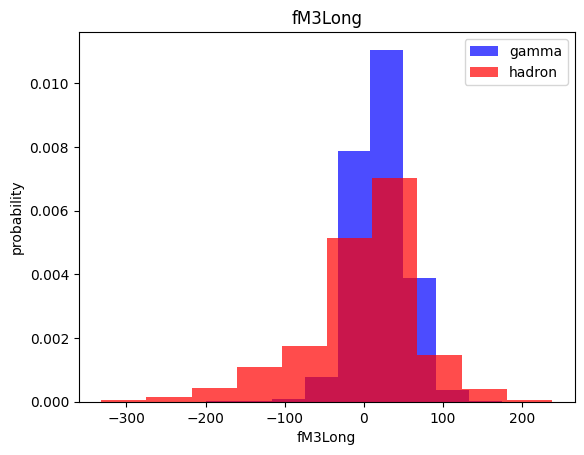

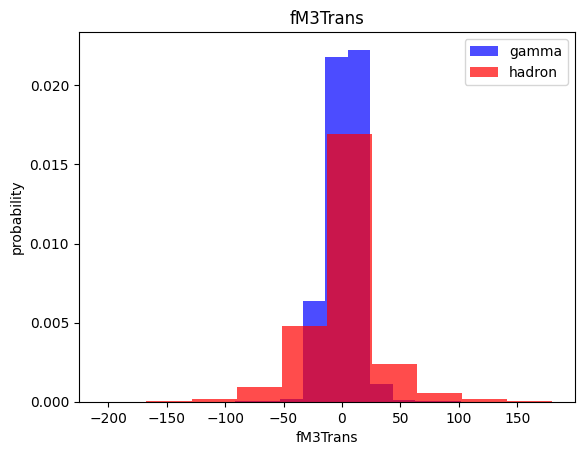

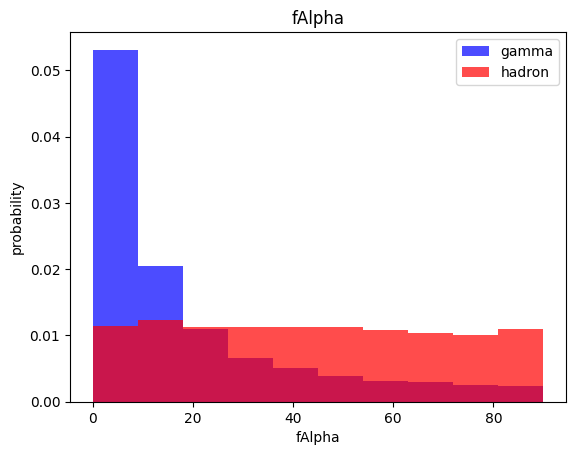

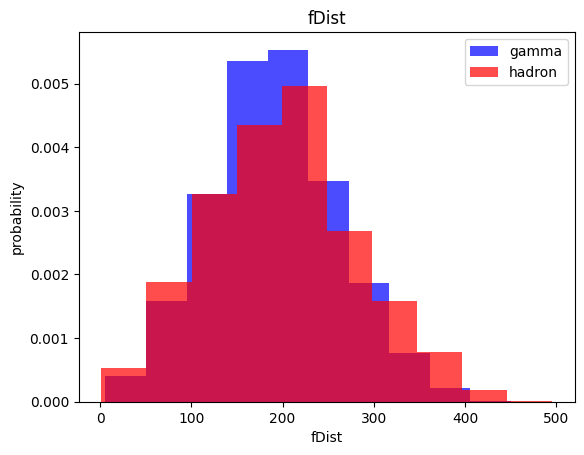

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
 train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y




In [ ]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
5524    67.2561  22.7657  3.3872  0.1915  0.0986   54.9154   60.9973   
14341  153.6790  83.7294  3.4749  0.1143  0.0581   72.7273  134.2770   
16043   63.1221  35.8997  3.2316  0.1808  0.0743    5.8723  -44.0632   
12577  188.1910  65.7200  3.4717  0.1934  0.1021 -241.5250 -158.8370   
4914    17.8657  10.8671  2.2529  0.5307  0.2710    1.1828   -6.9055   
...         ...      ...     ...     ...     ...       ...       ...   
16064  152.4108  53.0170  3.1078  0.2442  0.1259 -196.6195   98.1779   
18996   29.8353  11.3519  2.4449  0.4890  0.2948    9.9236   -9.0429   
904     81.5827  22.0786  3.1838  0.2502  0.1287   24.4813   51.1844   
5721    69.0585  27.2418  3.5735  0.1332  0.0709   85.0411   59.4095   
2580    52.7704  22.7587  3.3010  0.2210  0.1213  -10.0616  -38.6660   

       fM3Trans   fAlpha     fDist  class  
5524    13.4807   4.6353  265.6610      1  
14341  -79.2455  29.1256   30.6439      0  
16043   36.3366  56.3522  186.8040      0  
12577  -67.2893  29.9206  225.4370      0  
4914    -3.2113  24.7720  144.2510      1  
...         ...      ...       ...    ...  
16064   35.4278  33.5791  245.8817      0  
18996   16.2790  17.1944  230.5486      0  
904     14.7843   0.5805  354.8920      1  
5721    -8.6602   1.5480  251.8840      1  
2580   -11.5354   0.2490  246.1660      1  

[11412 rows x 11 columns]

In [ ]:
train,x_train,y_train =scale_dataset(train,oversample=True)
valid,x_valid,y_valid =scale_dataset(valid,oversample=False)
test,x_test,y_test =scale_dataset(test,oversample=False)

KNN(k-nearest neighbor algorithm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1374
           1       0.83      0.90      0.86      2430

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [ ]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49      1374
           1       0.72      0.91      0.81      2430

    accuracy                           0.72      3804
   macro avg       0.72      0.64      0.65      3804
weighted avg       0.72      0.72      0.69      3804



logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1374
           1       0.80      0.91      0.85      2430

    accuracy                           0.79      3804
   macro avg       0.79      0.75      0.76      3804
weighted avg       0.79      0.79      0.79      3804



support vector machine

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1374
           1       0.85      0.95      0.90      2430

    accuracy                           0.86      3804
   macro avg       0.87      0.83      0.84      3804
weighted avg       0.87      0.86      0.86      3804



tensorflow


In [ ]:
import tensorflow as tf


In [ ]:
#plotting the loss
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
#plotting the accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),  # Use the correct input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the Model
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [ ]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel ('Accuracy')
  ax2.grid(True)
  plt.show()



    # x_train, y_train,
    # epochs=100,#Train for 100 epochs
    # batch_size=32,#Process 32 samples per batch
    # validation_split=0.2,#Use 20% of the data for validation
    # verbose=0#Display training progress

In [ ]:
plot_history(history)

NameError: name 'history' is not defined

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
  tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(num_nodes,activation='relu'),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history




16 nodes, dropout 0, lr 0.01, batch size 32


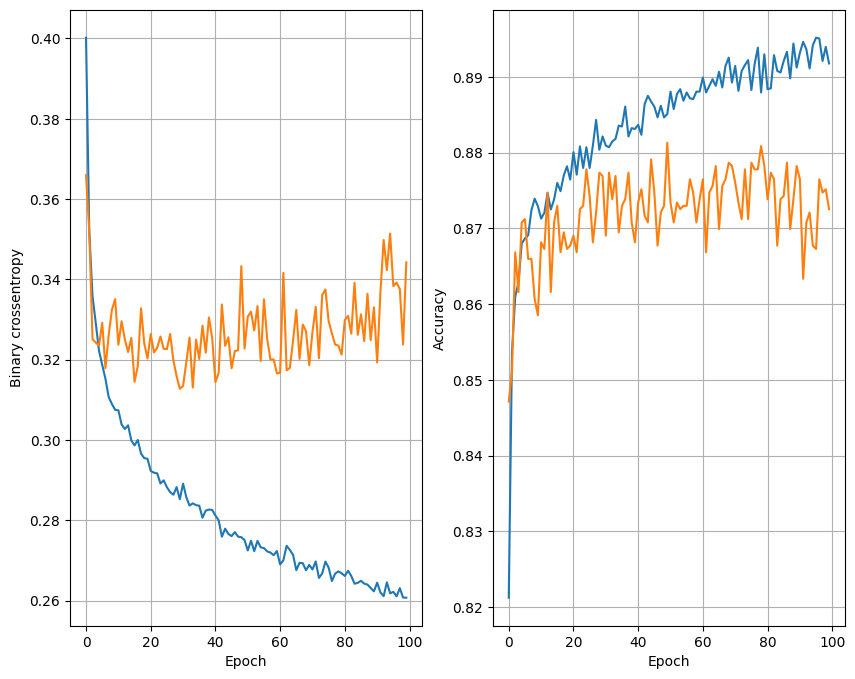

Validation Loss: 0.3850563168525696
Updated least loss model.
16 nodes, dropout 0, lr 0.01, batch size 64


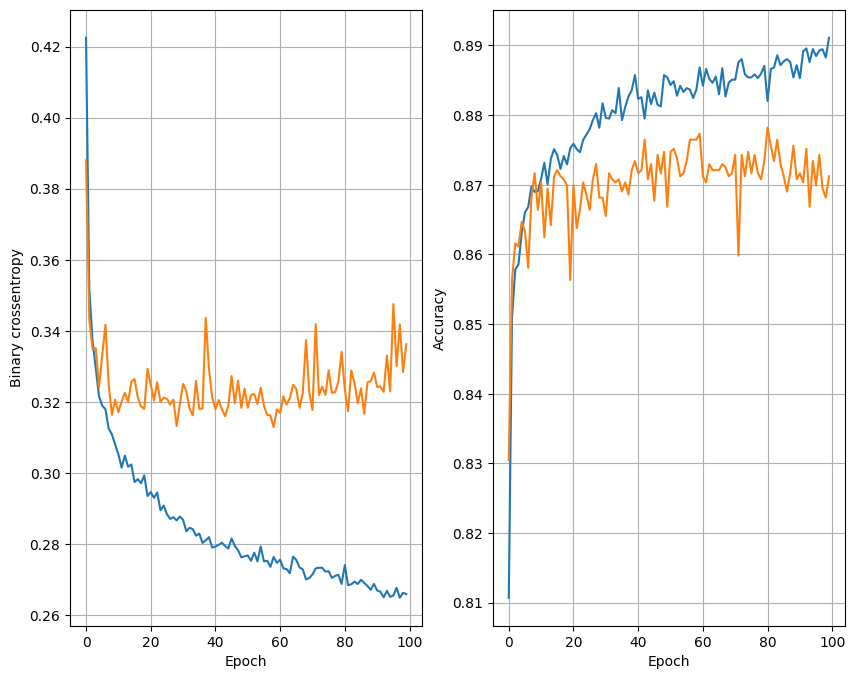

Validation Loss: 0.3426092565059662
Updated least loss model.
16 nodes, dropout 0, lr 0.01, batch size 128


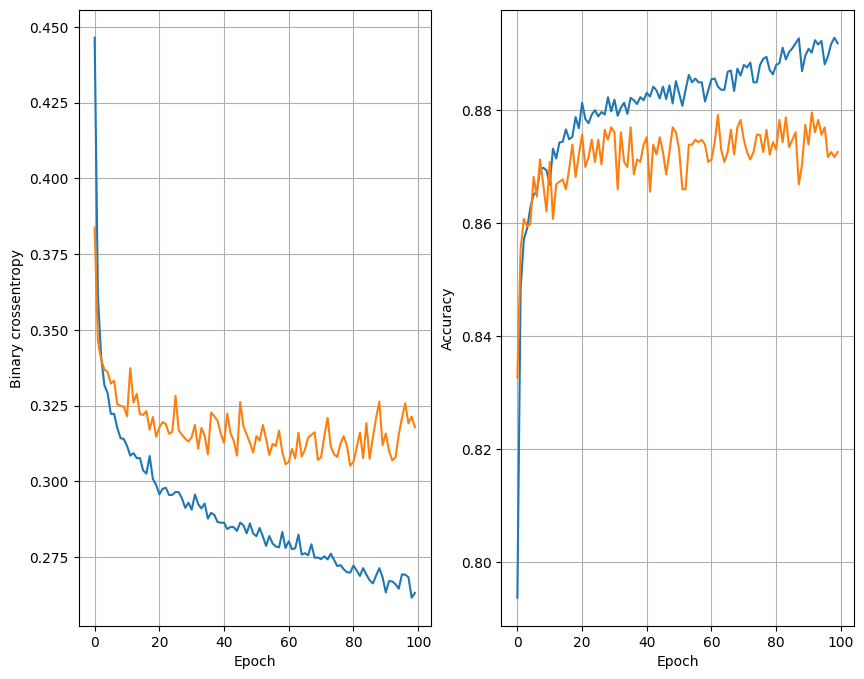

Validation Loss: 0.3341572880744934
Updated least loss model.
16 nodes, dropout 0, lr 0.005, batch size 32


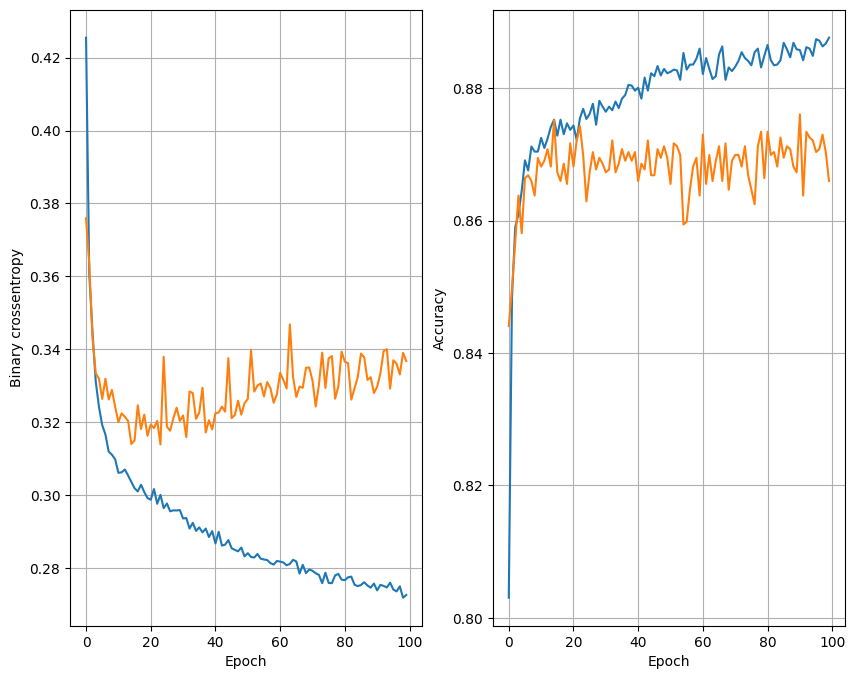

Validation Loss: 0.34769272804260254
16 nodes, dropout 0, lr 0.005, batch size 64


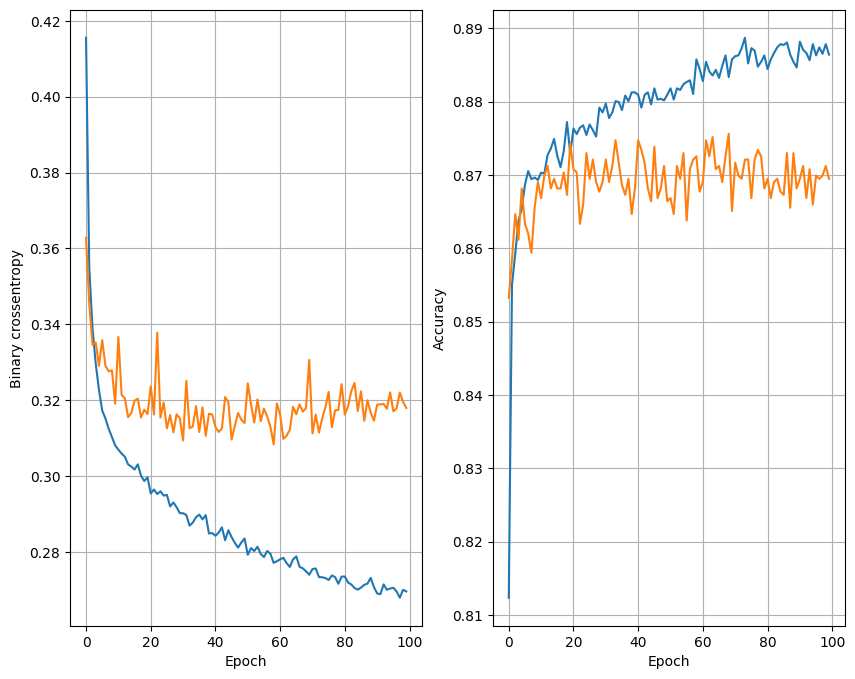

Validation Loss: 0.3379175364971161
16 nodes, dropout 0, lr 0.005, batch size 128


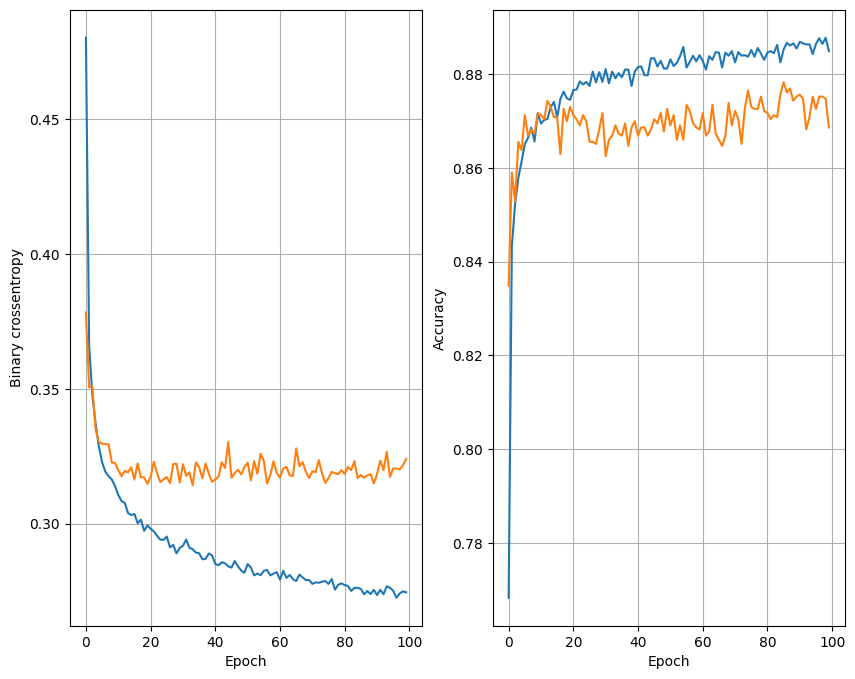

Validation Loss: 0.33930107951164246
16 nodes, dropout 0, lr 0.001, batch size 32


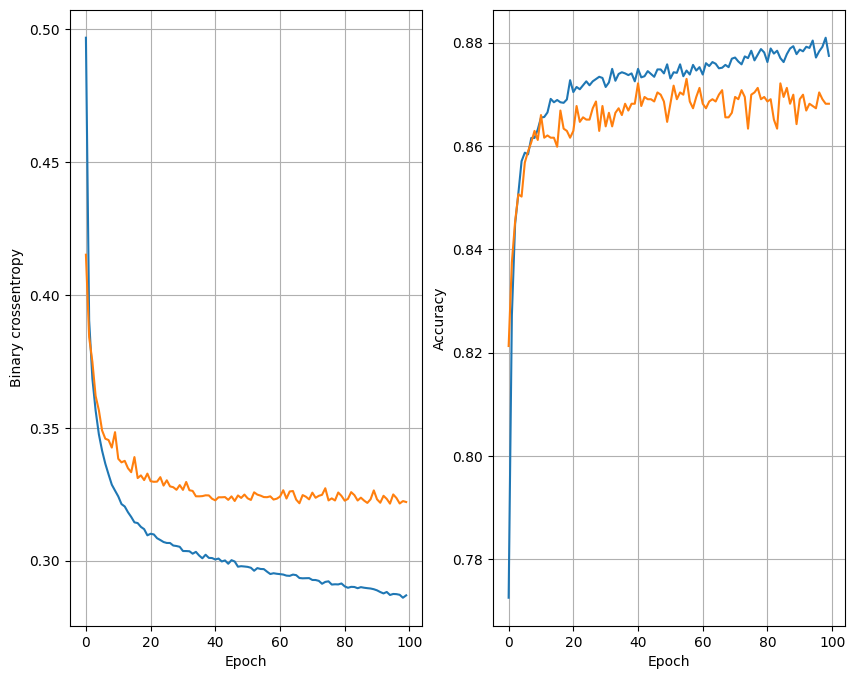

Validation Loss: 0.3323865830898285
Updated least loss model.
16 nodes, dropout 0, lr 0.001, batch size 64


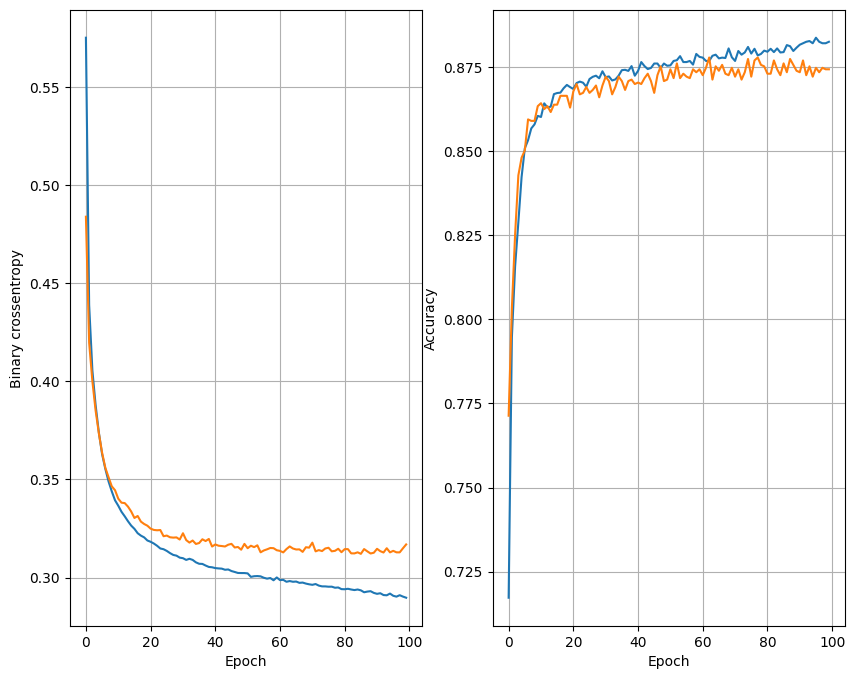

Validation Loss: 0.32798686623573303
Updated least loss model.
16 nodes, dropout 0, lr 0.001, batch size 128


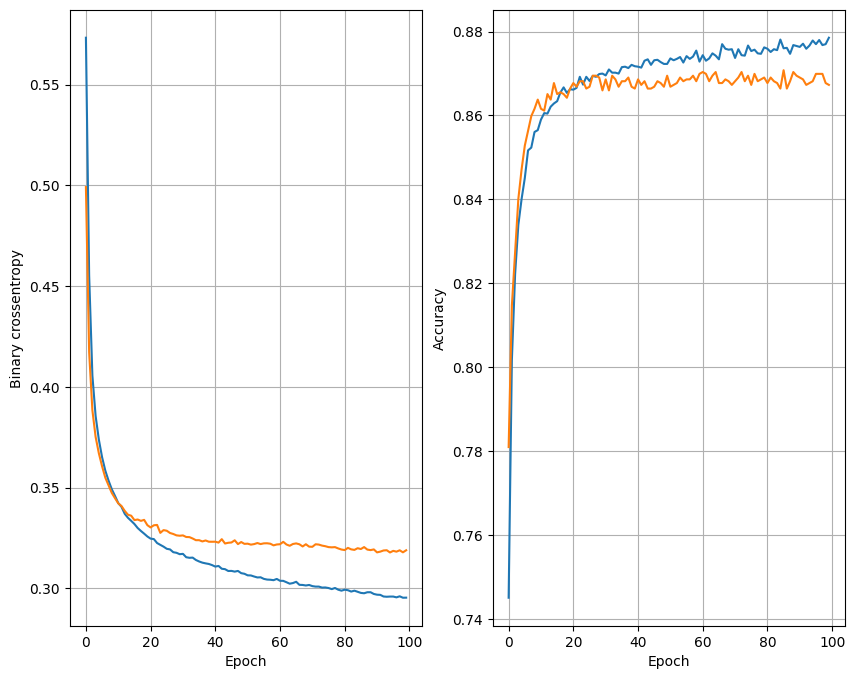

Validation Loss: 0.3266853094100952
Updated least loss model.
16 nodes, dropout 0.2, lr 0.01, batch size 32


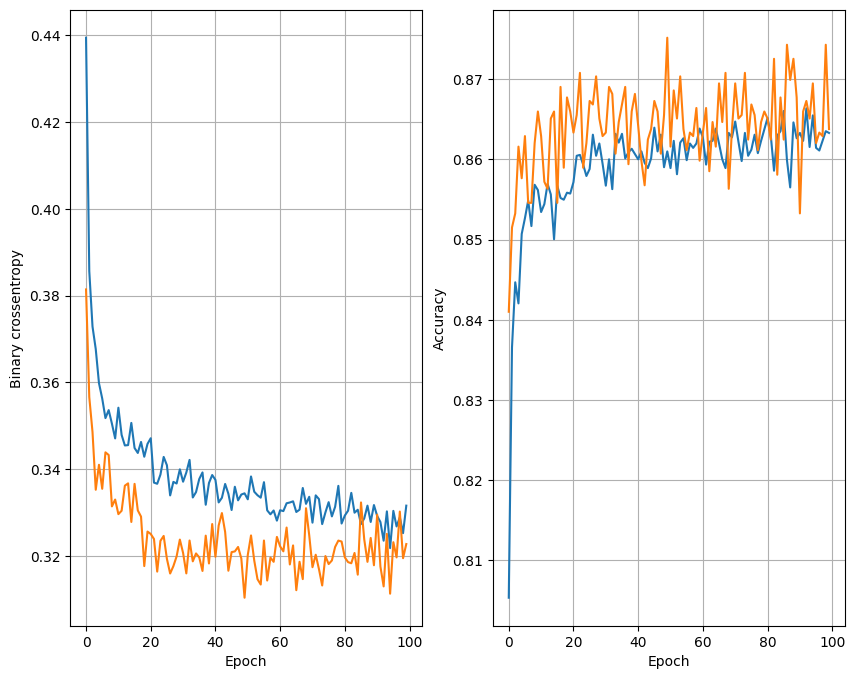

Validation Loss: 0.32790666818618774
16 nodes, dropout 0.2, lr 0.01, batch size 64


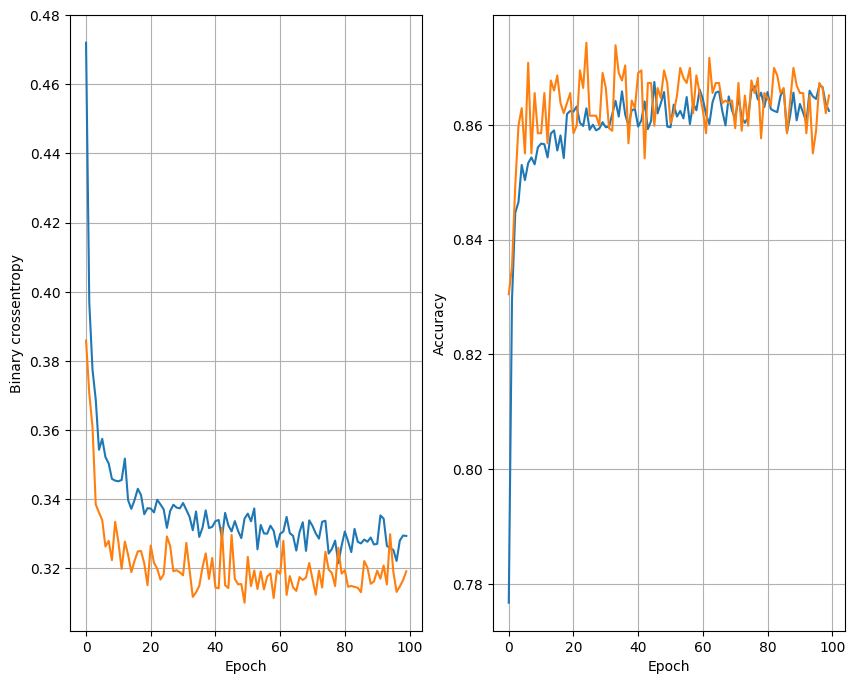

Validation Loss: 0.3288312256336212
16 nodes, dropout 0.2, lr 0.01, batch size 128


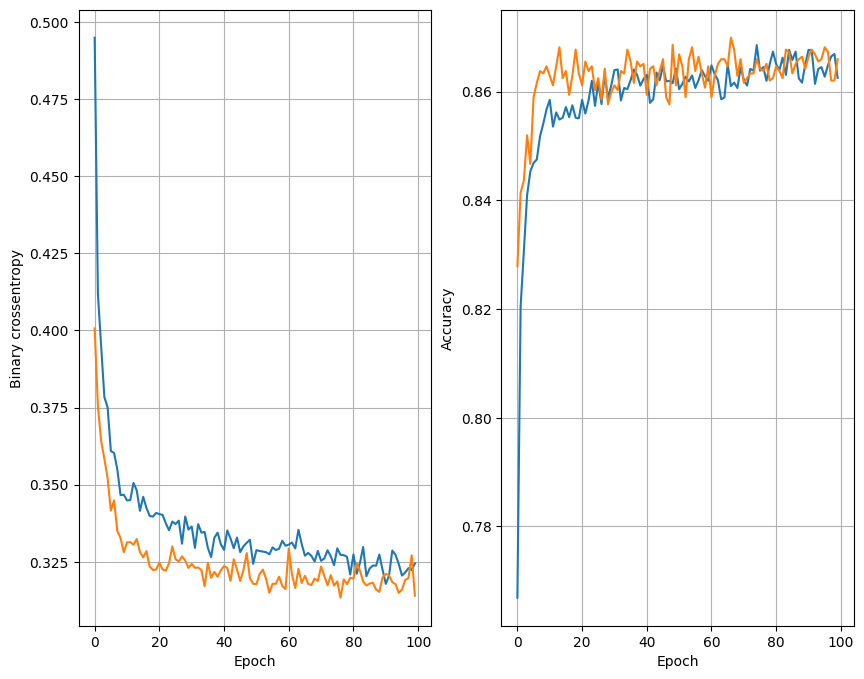

Validation Loss: 0.3272416591644287
16 nodes, dropout 0.2, lr 0.005, batch size 32


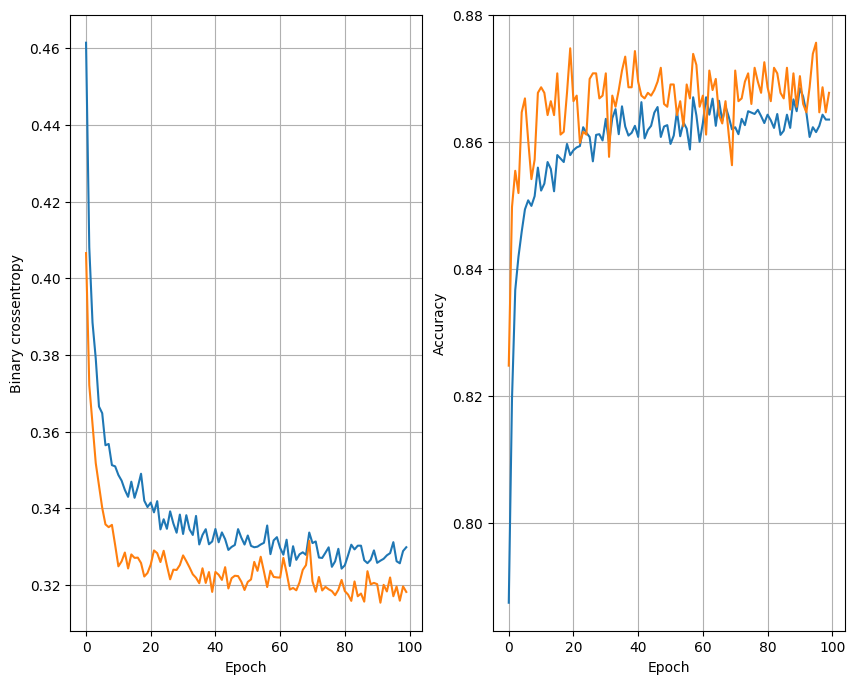

Validation Loss: 0.33130961656570435
16 nodes, dropout 0.2, lr 0.005, batch size 64


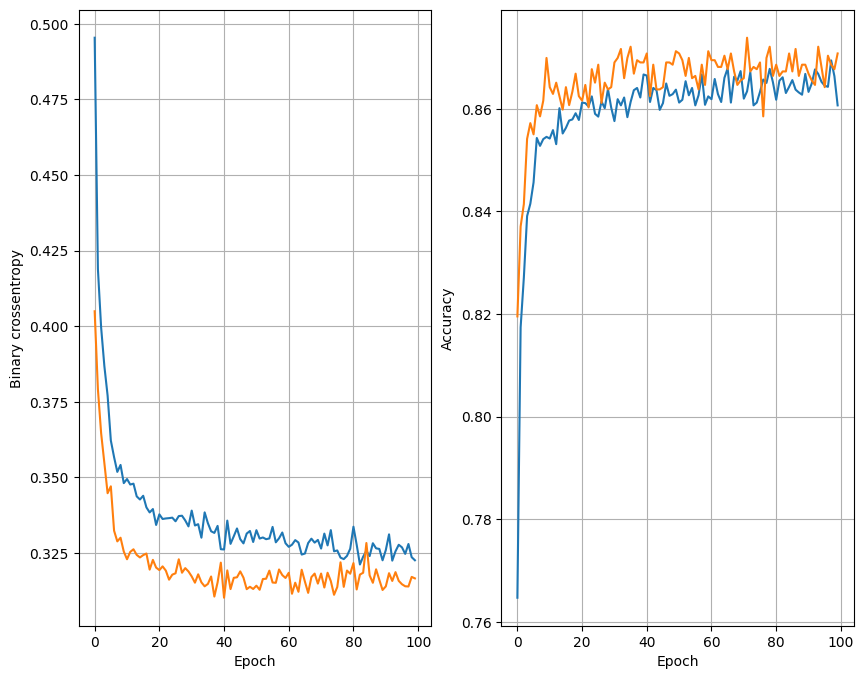

Validation Loss: 0.32500213384628296
Updated least loss model.
16 nodes, dropout 0.2, lr 0.005, batch size 128


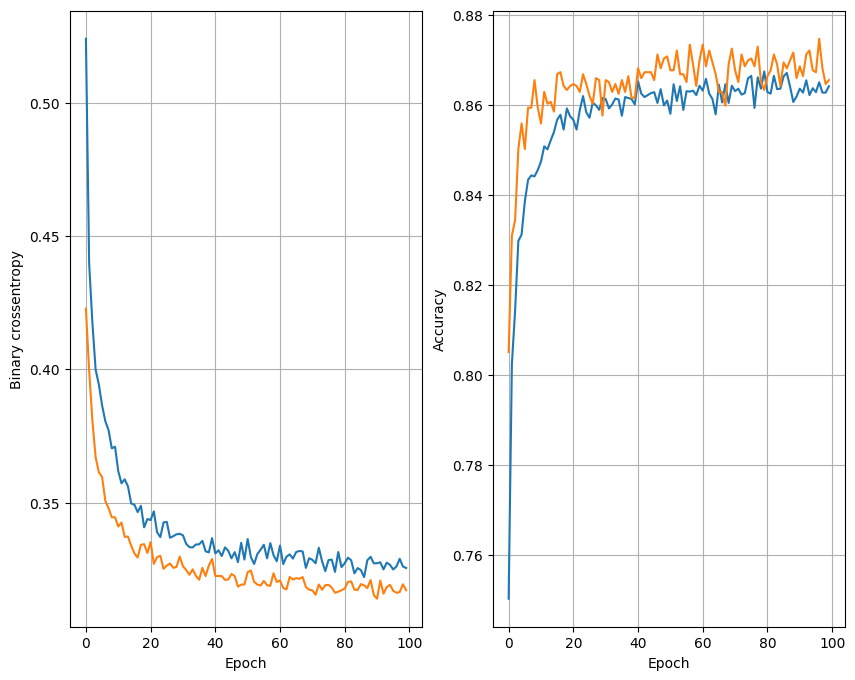

Validation Loss: 0.3243125379085541
Updated least loss model.
16 nodes, dropout 0.2, lr 0.001, batch size 32


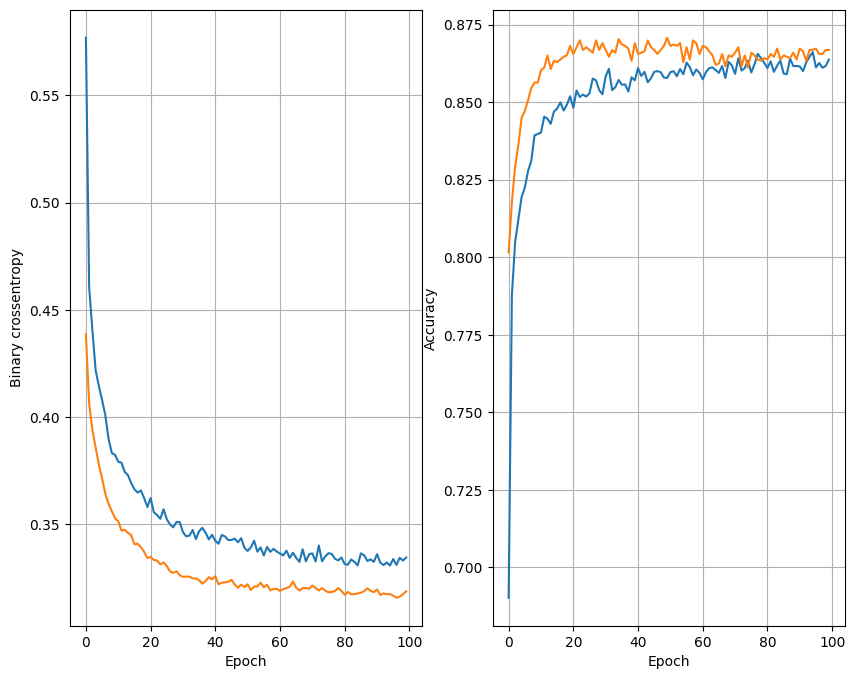

Validation Loss: 0.32980936765670776
16 nodes, dropout 0.2, lr 0.001, batch size 64


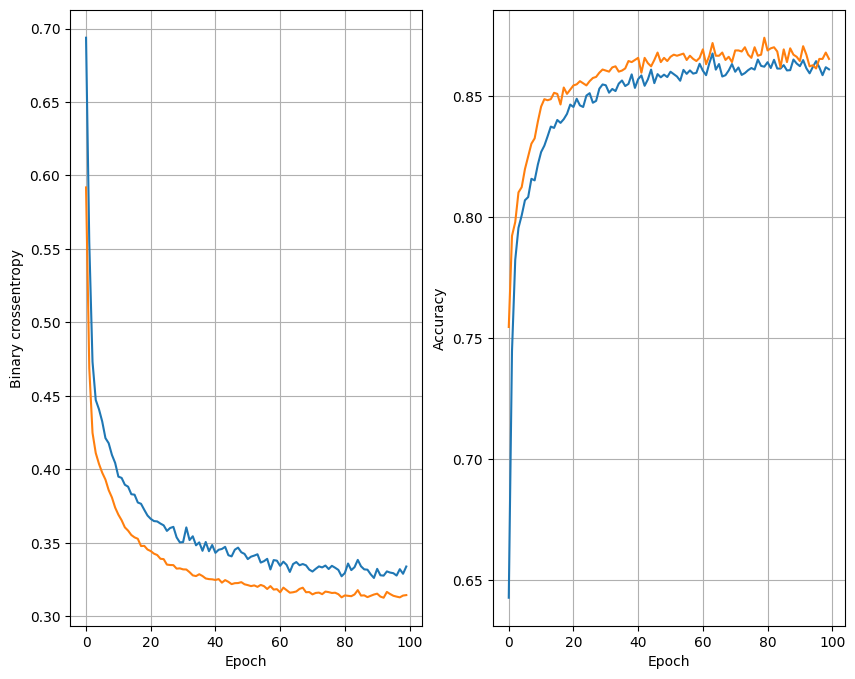

Validation Loss: 0.3259836733341217
16 nodes, dropout 0.2, lr 0.001, batch size 128


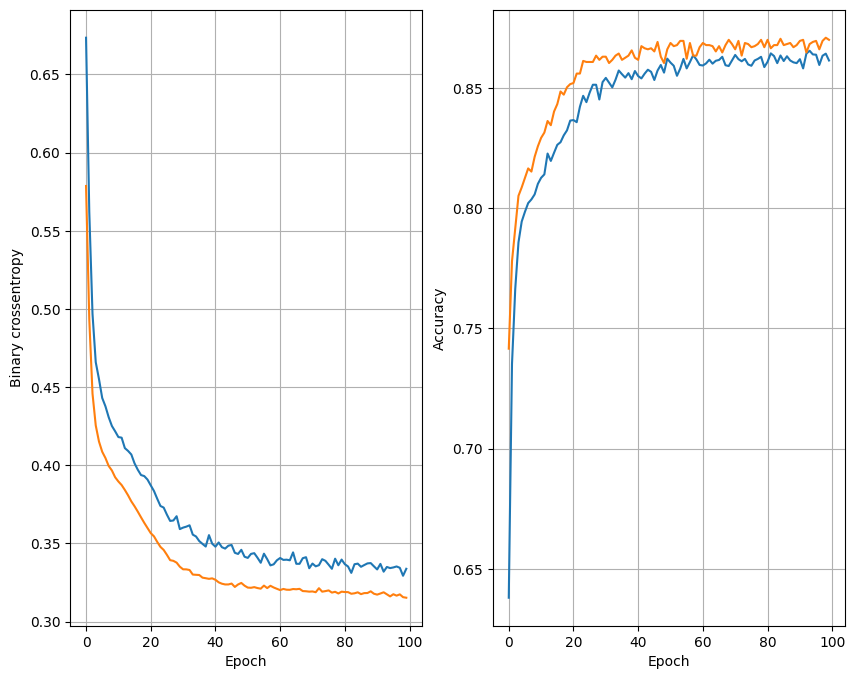

Validation Loss: 0.32892850041389465
32 nodes, dropout 0, lr 0.01, batch size 32


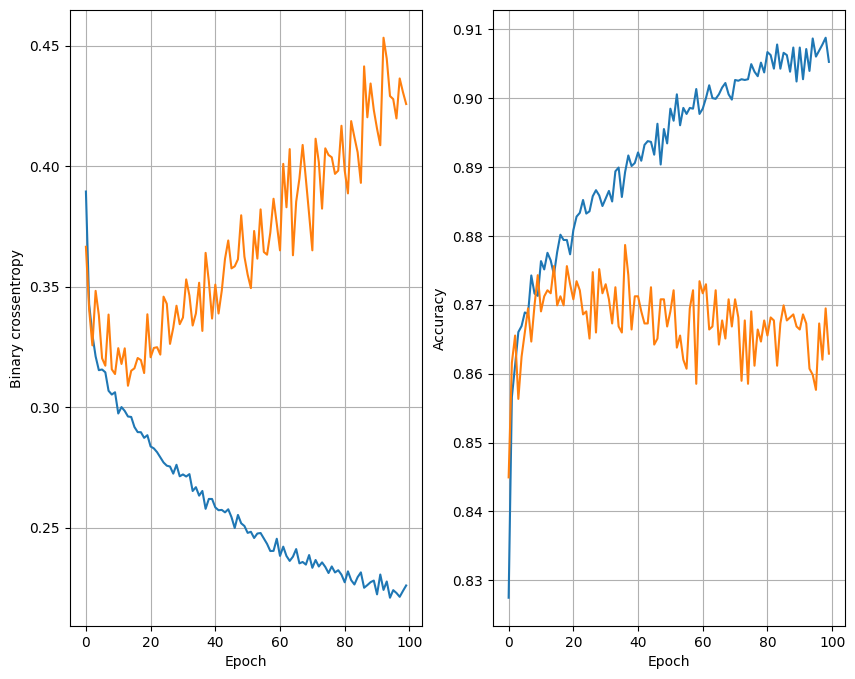

Validation Loss: 0.45917072892189026
32 nodes, dropout 0, lr 0.01, batch size 64


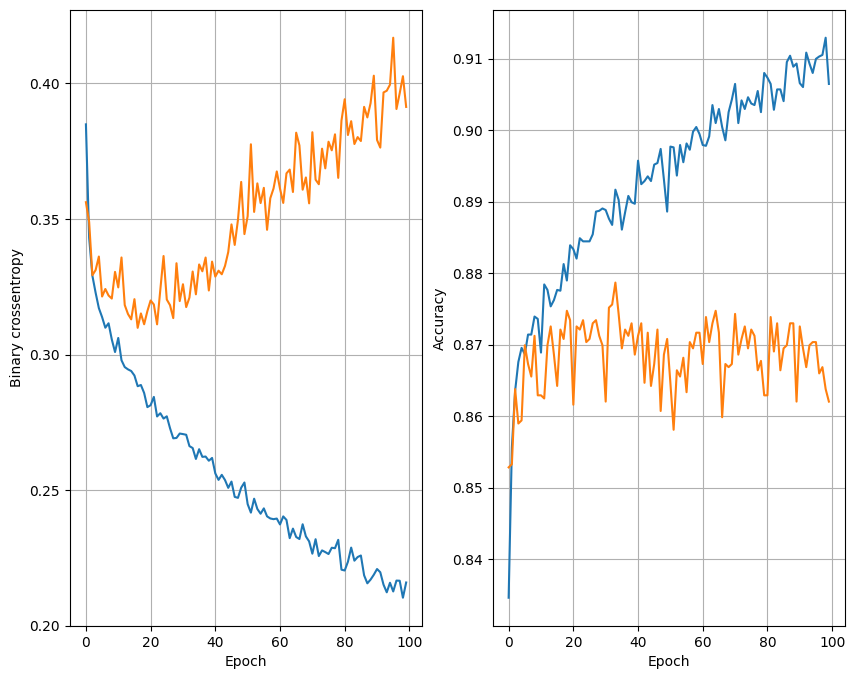

Validation Loss: 0.4463198781013489
32 nodes, dropout 0, lr 0.01, batch size 128


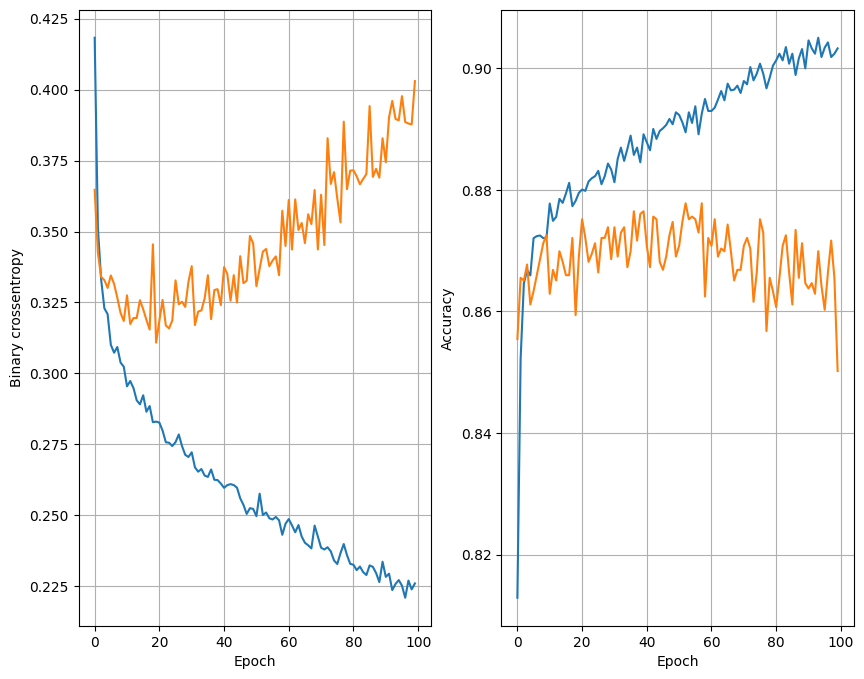

Validation Loss: 0.4249939024448395
32 nodes, dropout 0, lr 0.005, batch size 32


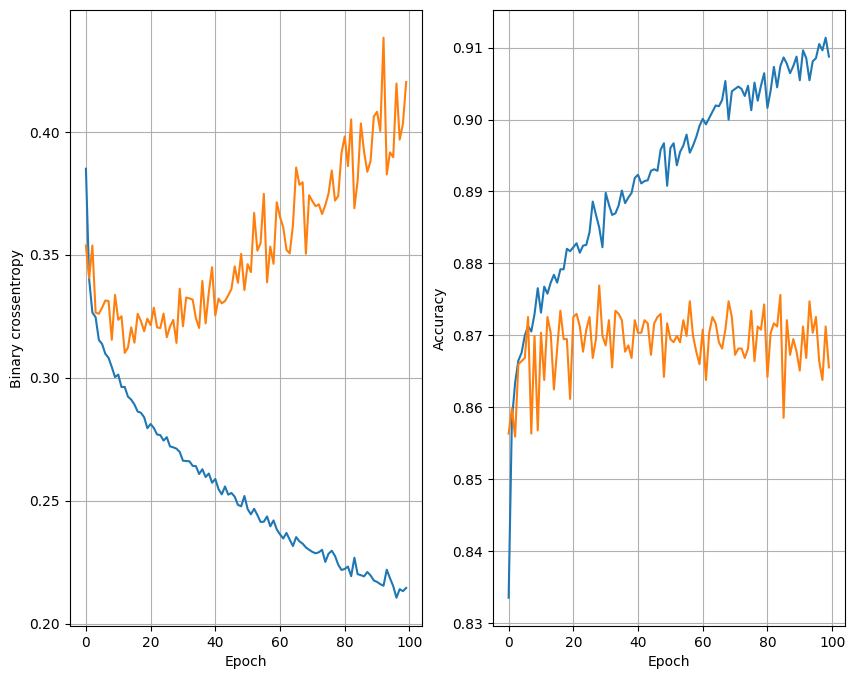

Validation Loss: 0.44823646545410156
32 nodes, dropout 0, lr 0.005, batch size 64


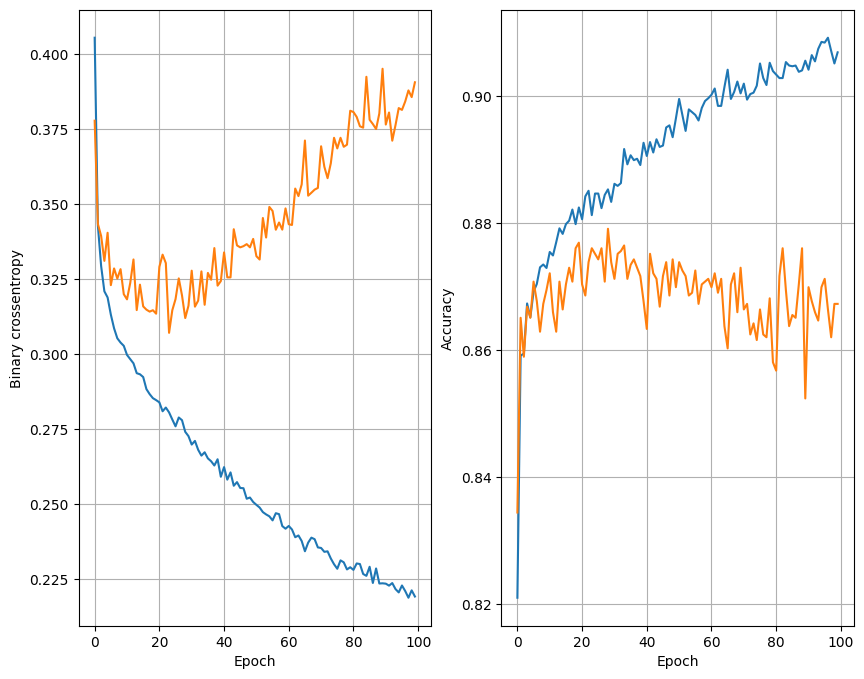

Validation Loss: 0.4133118689060211
32 nodes, dropout 0, lr 0.005, batch size 128


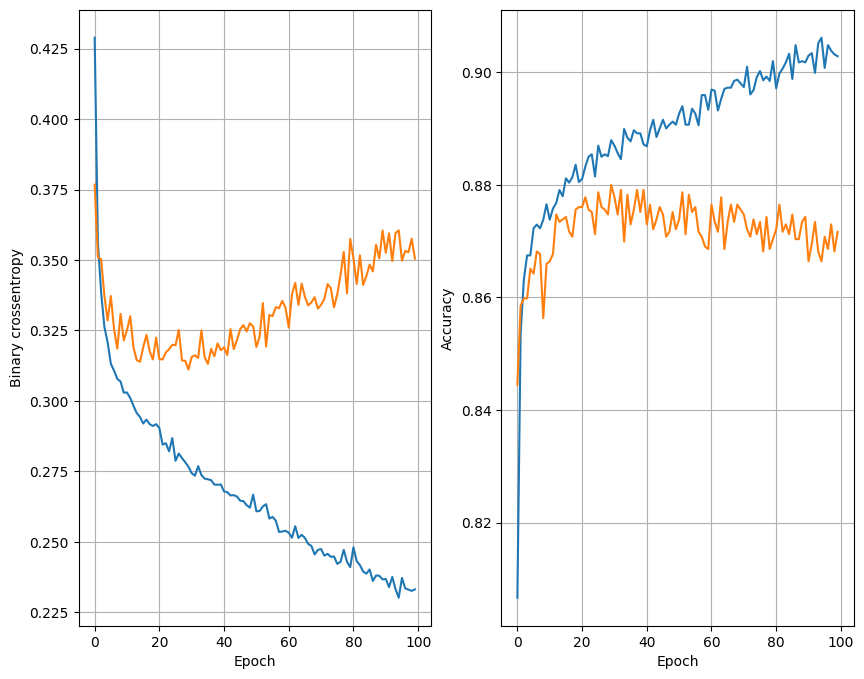

Validation Loss: 0.3840237557888031
32 nodes, dropout 0, lr 0.001, batch size 32


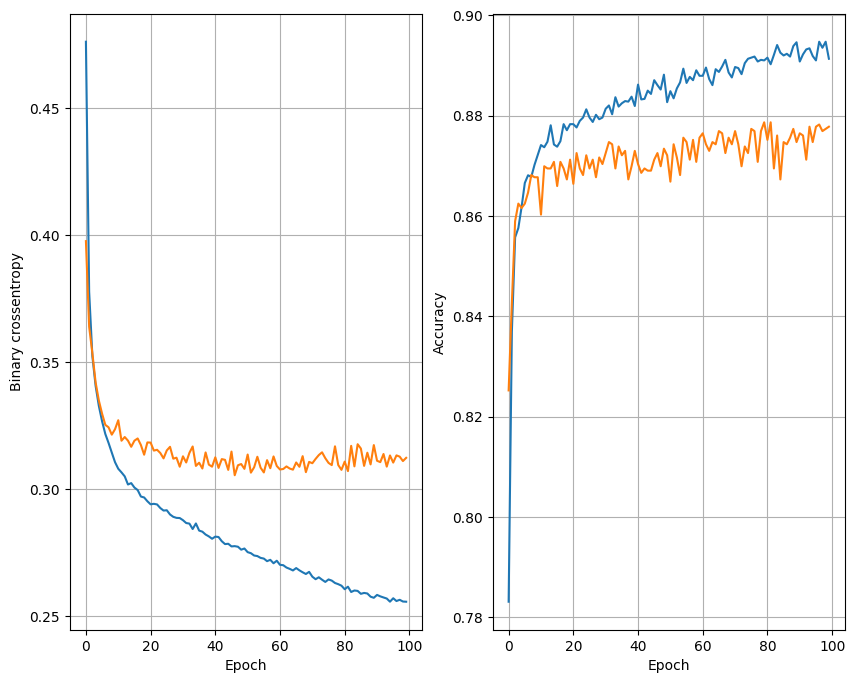

Validation Loss: 0.3314001262187958
32 nodes, dropout 0, lr 0.001, batch size 64


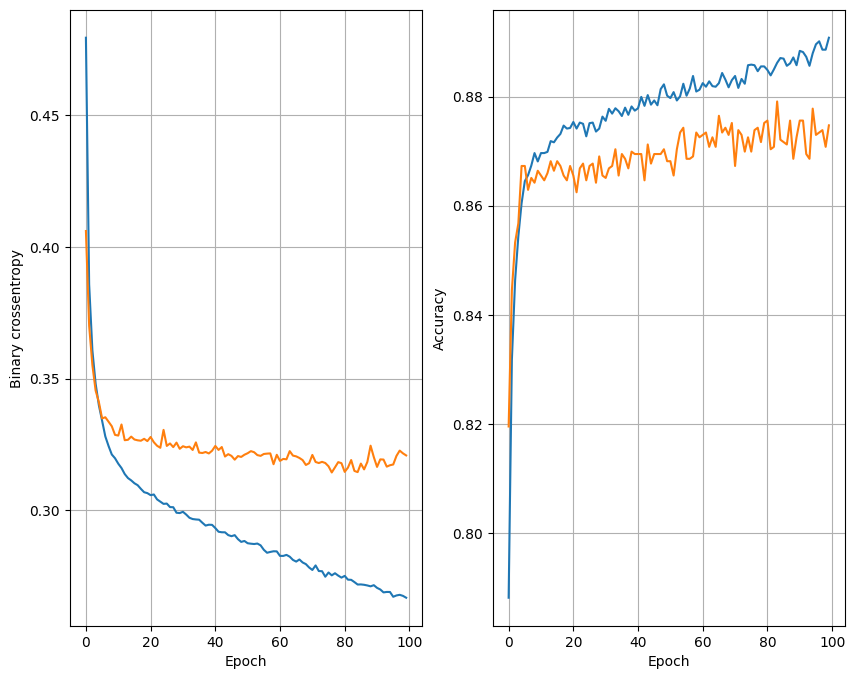

Validation Loss: 0.33135929703712463
32 nodes, dropout 0, lr 0.001, batch size 128


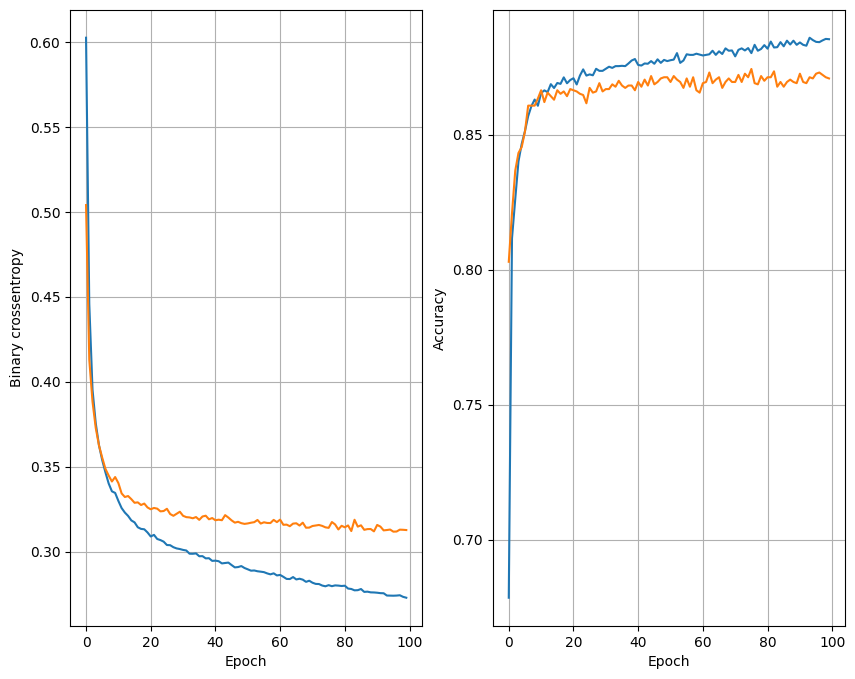

Validation Loss: 0.3276415467262268
32 nodes, dropout 0.2, lr 0.01, batch size 32


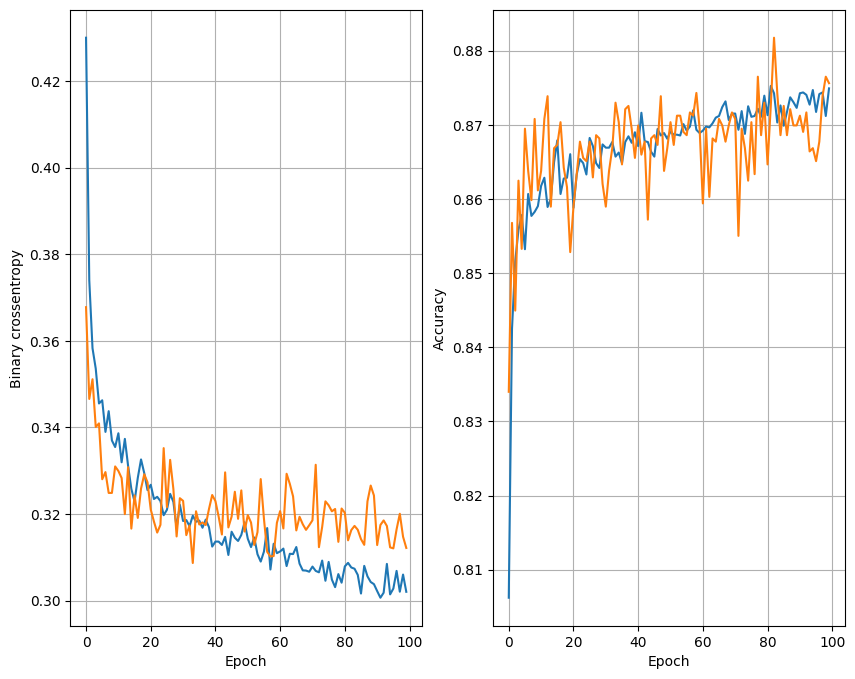

Validation Loss: 0.3273380398750305
32 nodes, dropout 0.2, lr 0.01, batch size 64


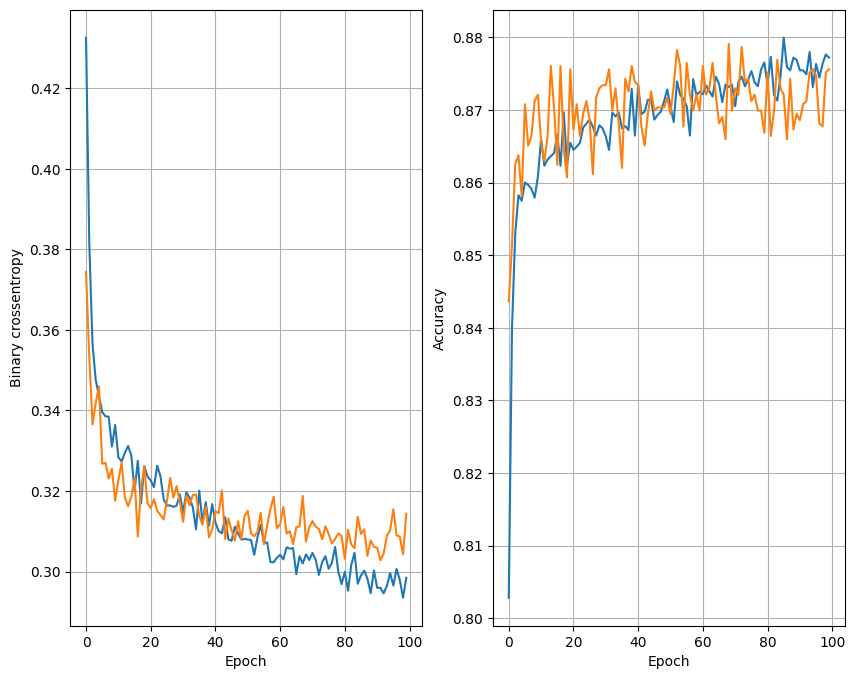

Validation Loss: 0.3306850790977478
32 nodes, dropout 0.2, lr 0.01, batch size 128


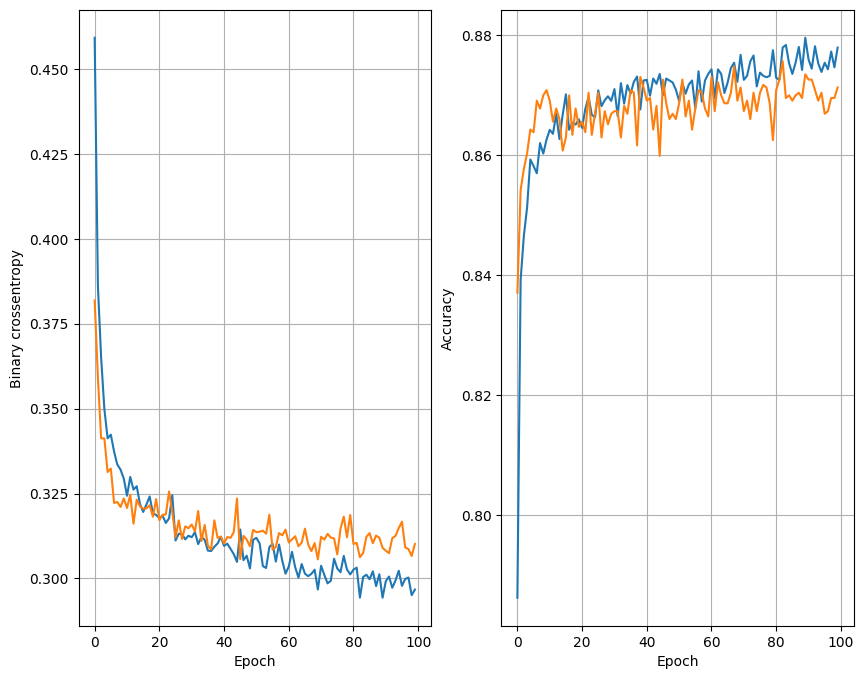

Validation Loss: 0.3289850354194641
32 nodes, dropout 0.2, lr 0.005, batch size 32


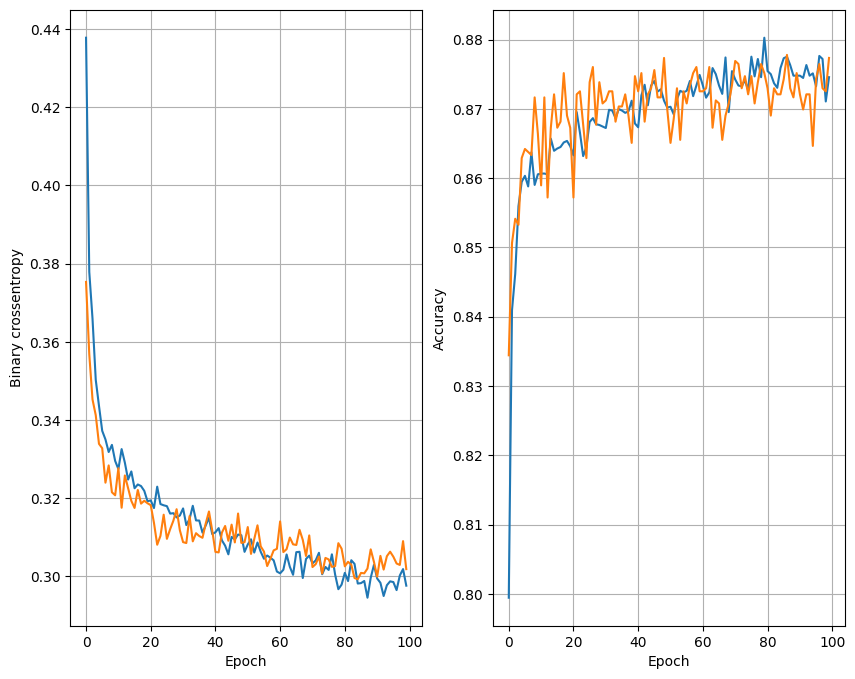

Validation Loss: 0.3218681514263153
Updated least loss model.
32 nodes, dropout 0.2, lr 0.005, batch size 64


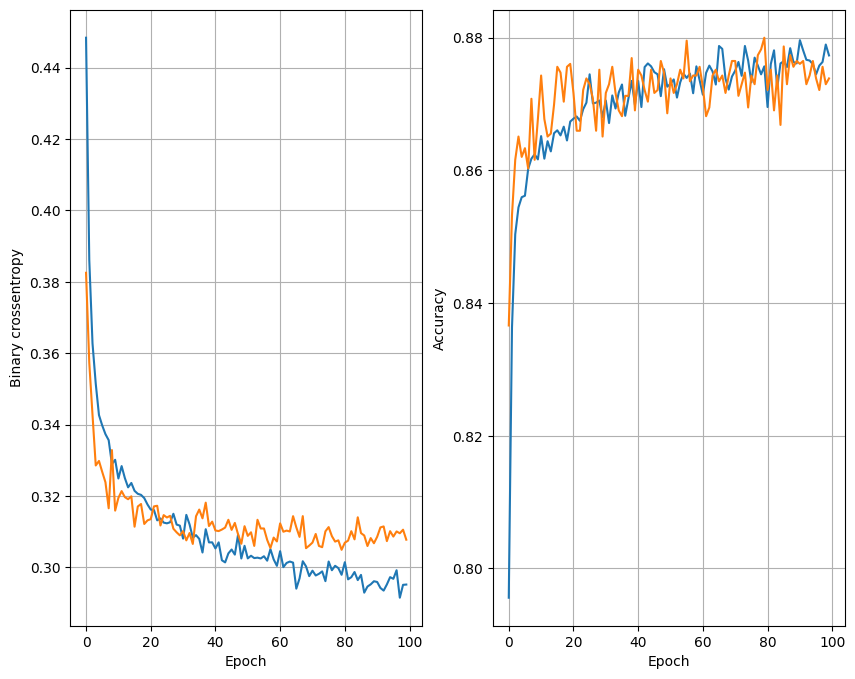

Validation Loss: 0.31565821170806885
Updated least loss model.
32 nodes, dropout 0.2, lr 0.005, batch size 128


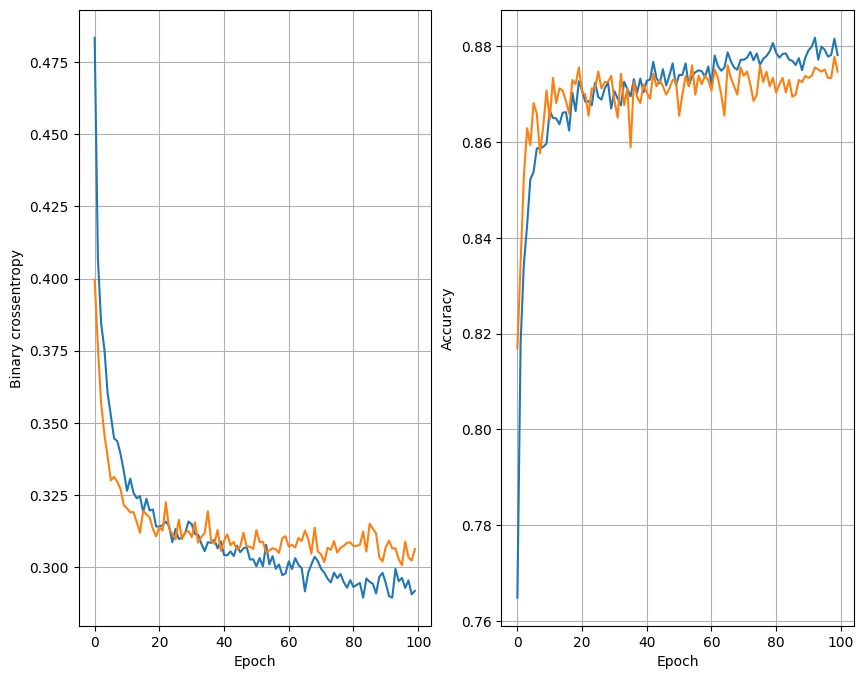

Validation Loss: 0.3206551969051361
32 nodes, dropout 0.2, lr 0.001, batch size 32


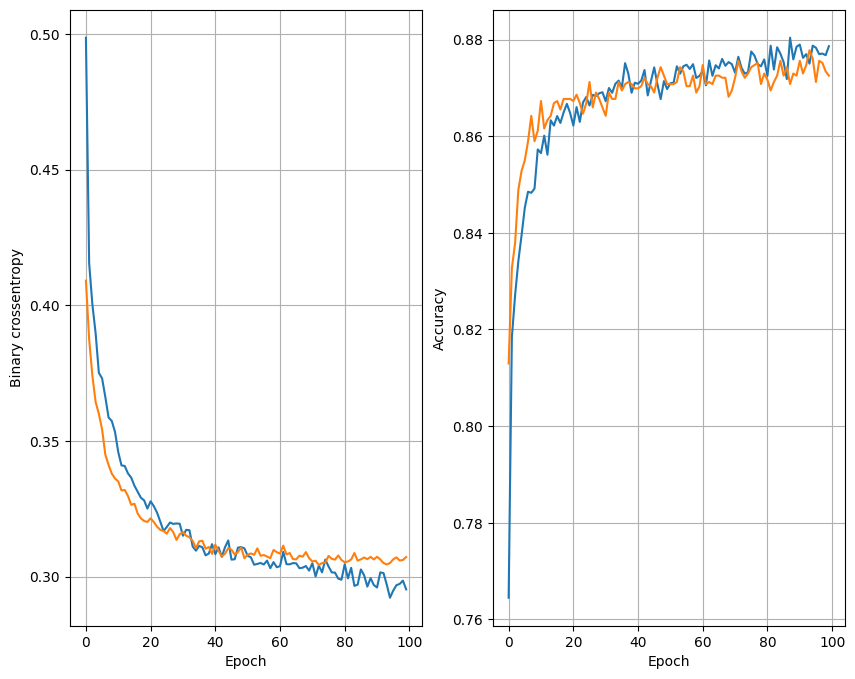

Validation Loss: 0.3095831871032715
Updated least loss model.
32 nodes, dropout 0.2, lr 0.001, batch size 64


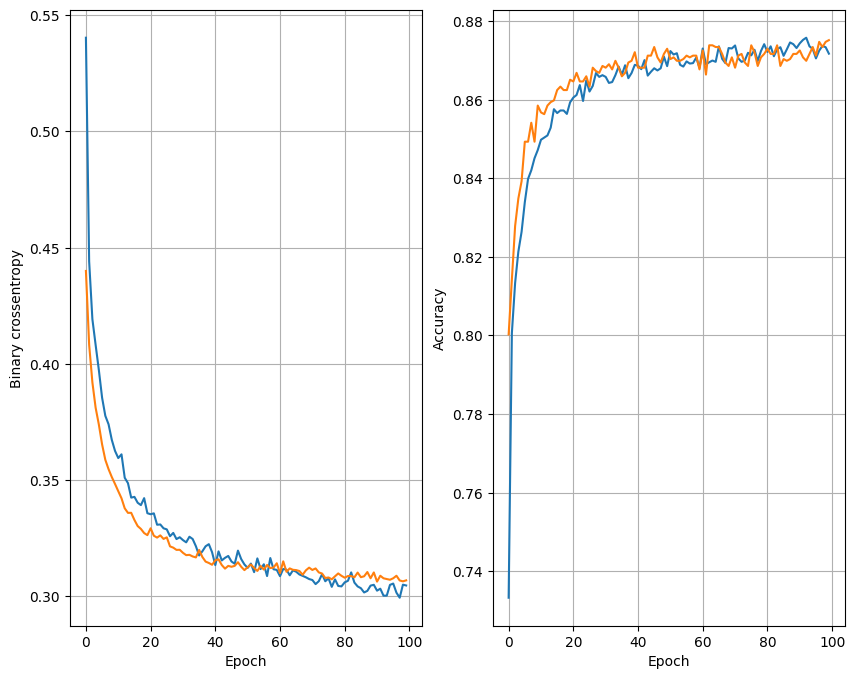

Validation Loss: 0.3151476979255676
32 nodes, dropout 0.2, lr 0.001, batch size 128


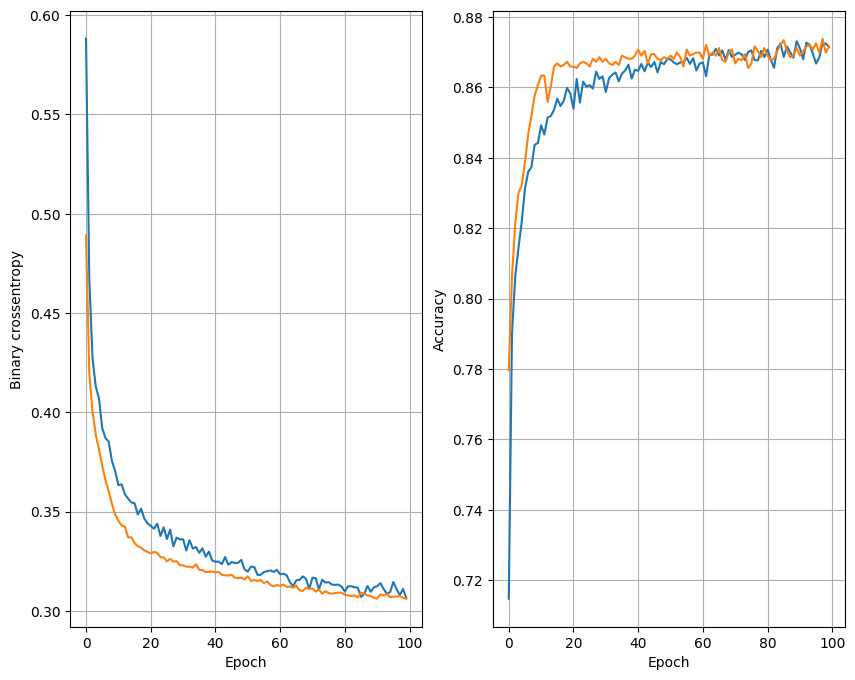

Validation Loss: 0.31898677349090576
64 nodes, dropout 0, lr 0.01, batch size 32


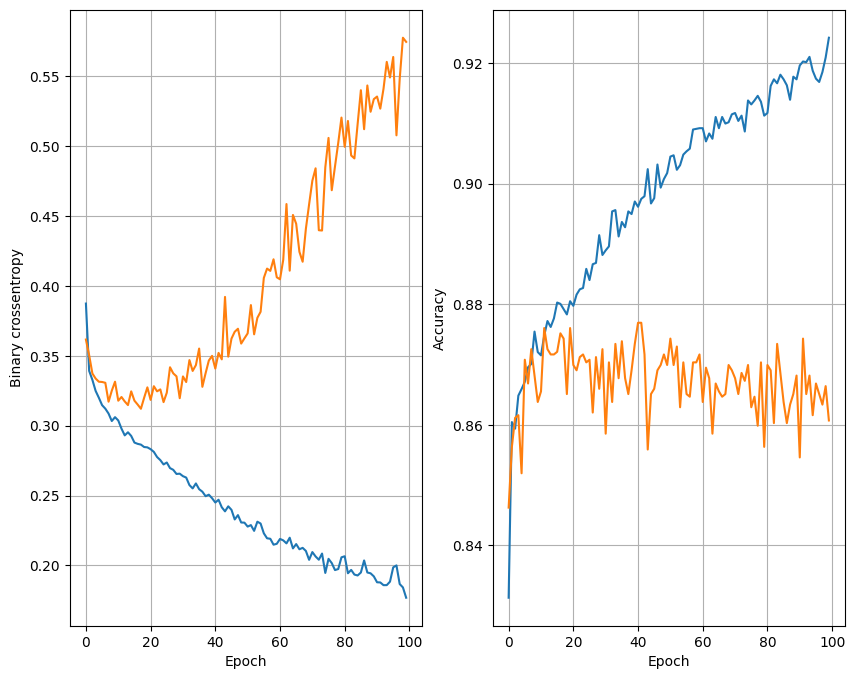

Validation Loss: 0.7323198914527893
64 nodes, dropout 0, lr 0.01, batch size 64


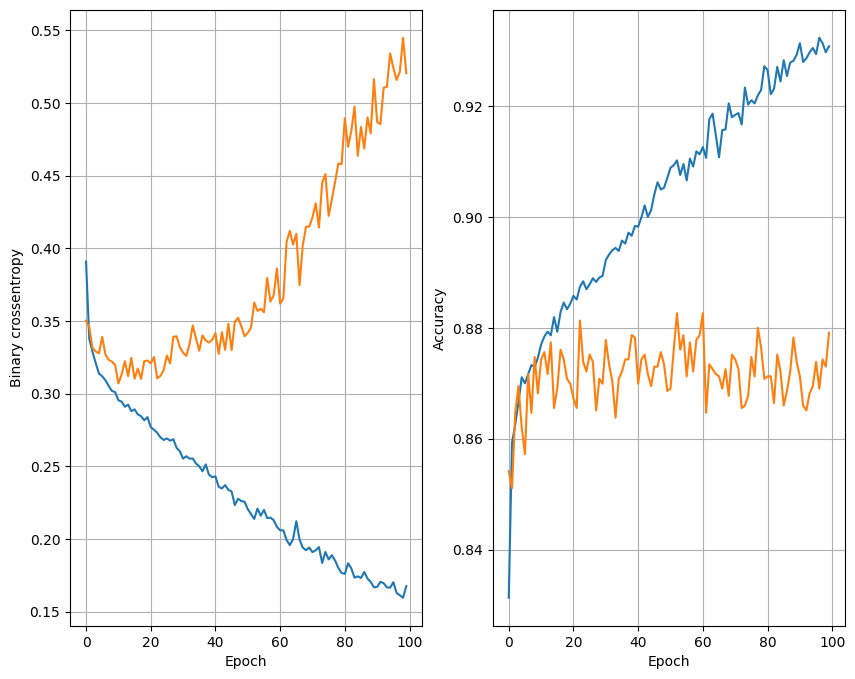

Validation Loss: 0.6245273351669312
64 nodes, dropout 0, lr 0.01, batch size 128


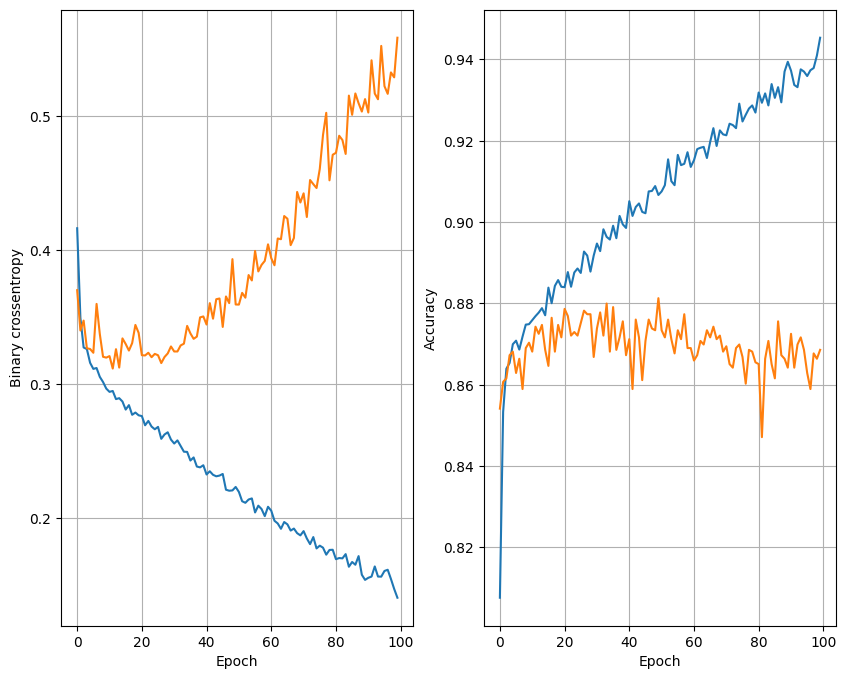

Validation Loss: 0.5831440091133118
64 nodes, dropout 0, lr 0.005, batch size 32


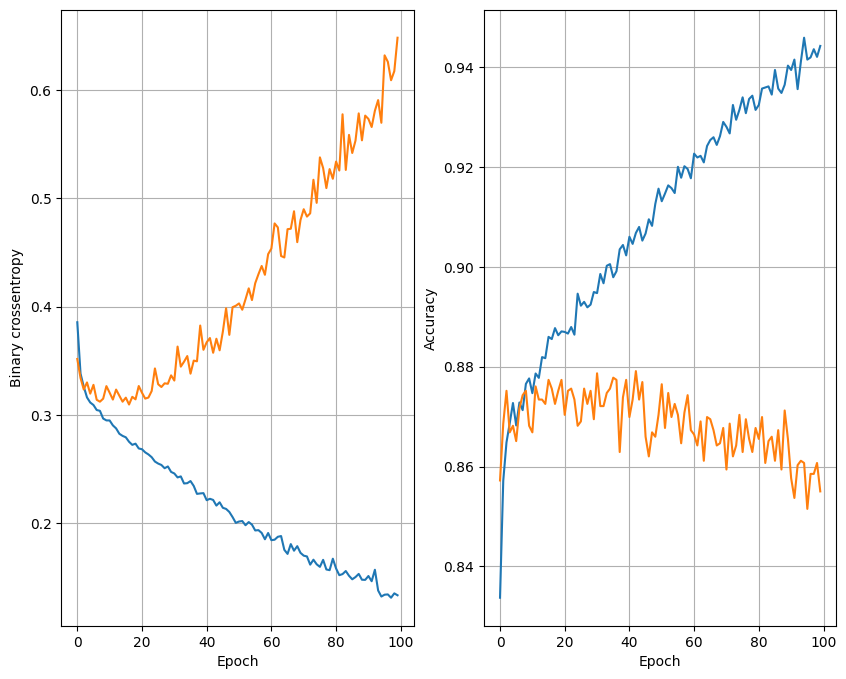

Validation Loss: 0.7288901805877686
64 nodes, dropout 0, lr 0.005, batch size 64


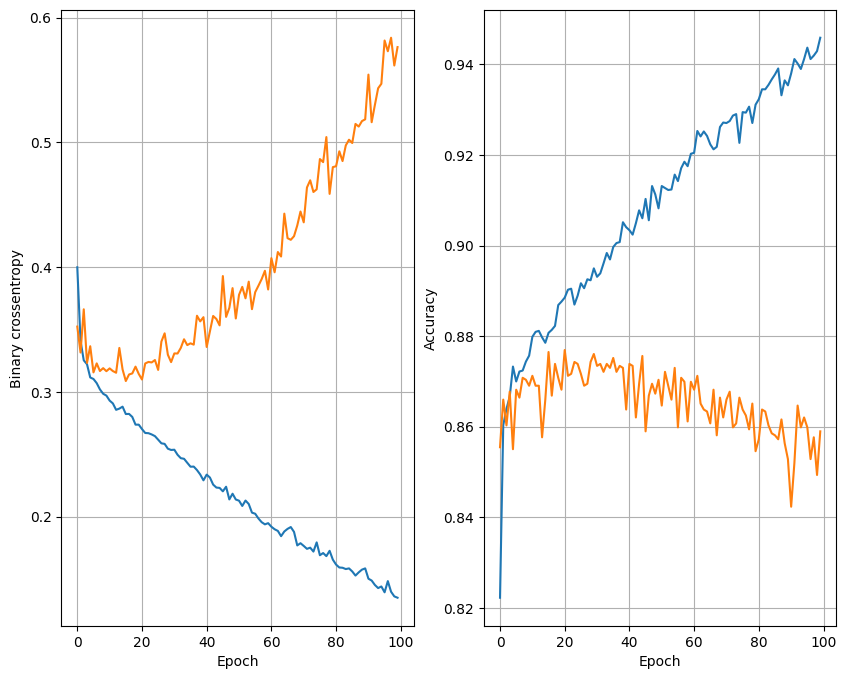

Validation Loss: 0.6458519101142883
64 nodes, dropout 0, lr 0.005, batch size 128


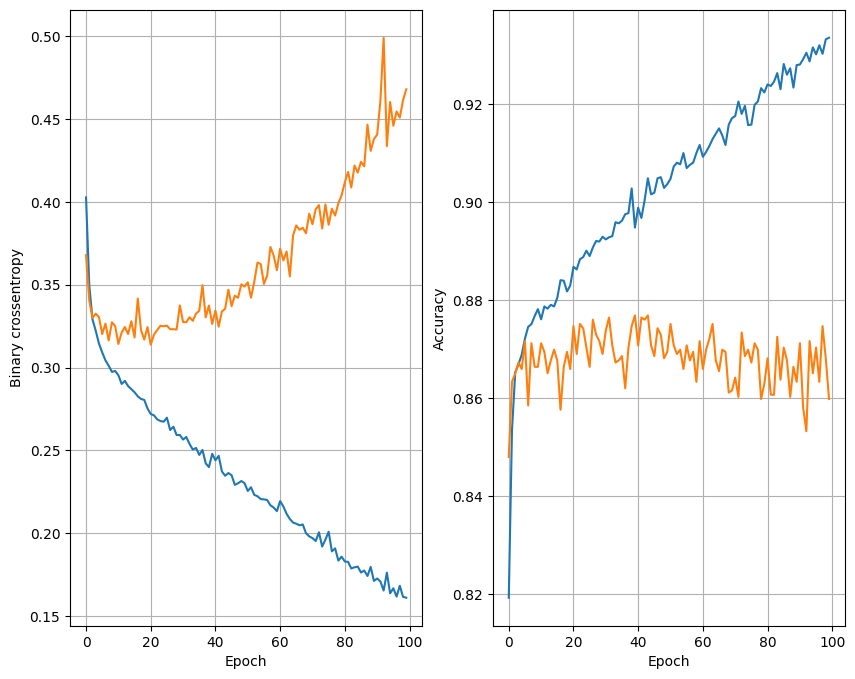

Validation Loss: 0.5164873003959656
64 nodes, dropout 0, lr 0.001, batch size 32


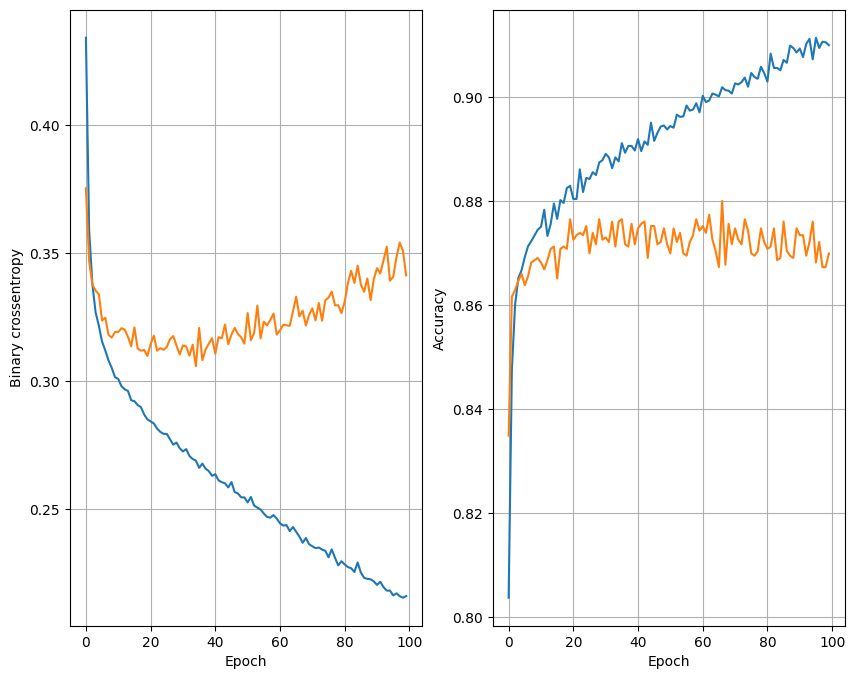

Validation Loss: 0.35977086424827576
64 nodes, dropout 0, lr 0.001, batch size 64


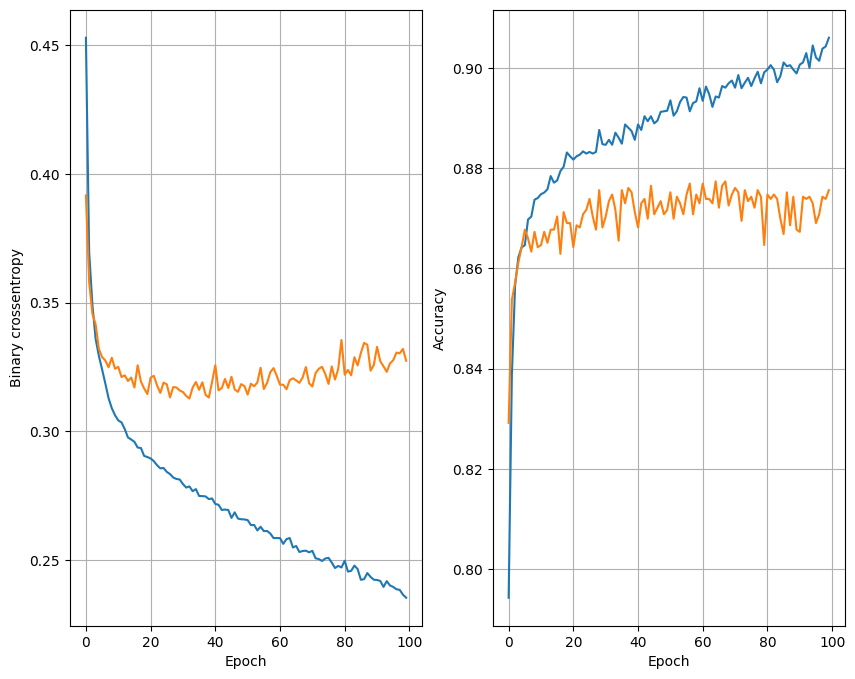

Validation Loss: 0.3430235981941223
64 nodes, dropout 0, lr 0.001, batch size 128


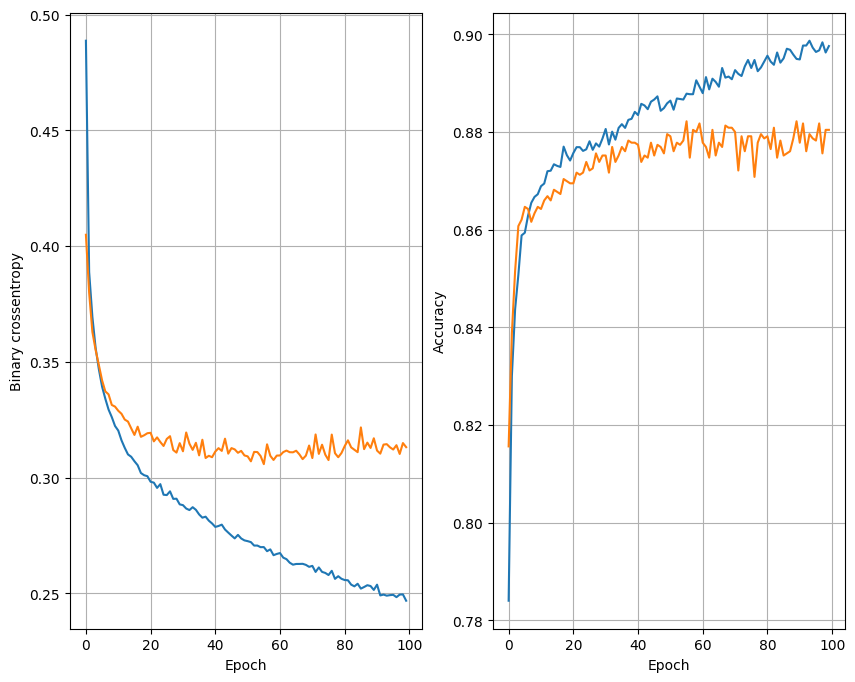

Validation Loss: 0.3338944613933563
64 nodes, dropout 0.2, lr 0.01, batch size 32


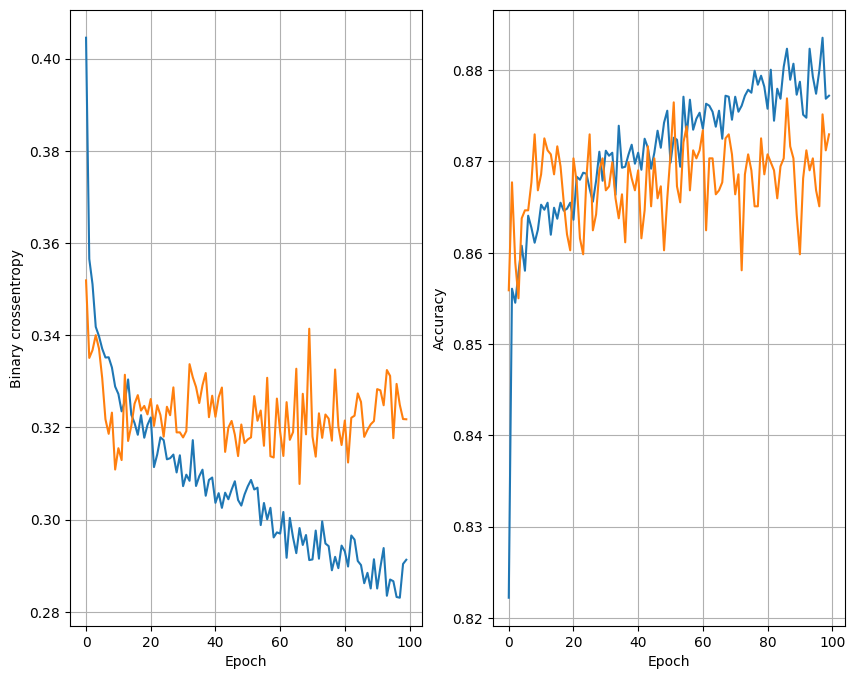

Validation Loss: 0.34651556611061096
64 nodes, dropout 0.2, lr 0.01, batch size 64


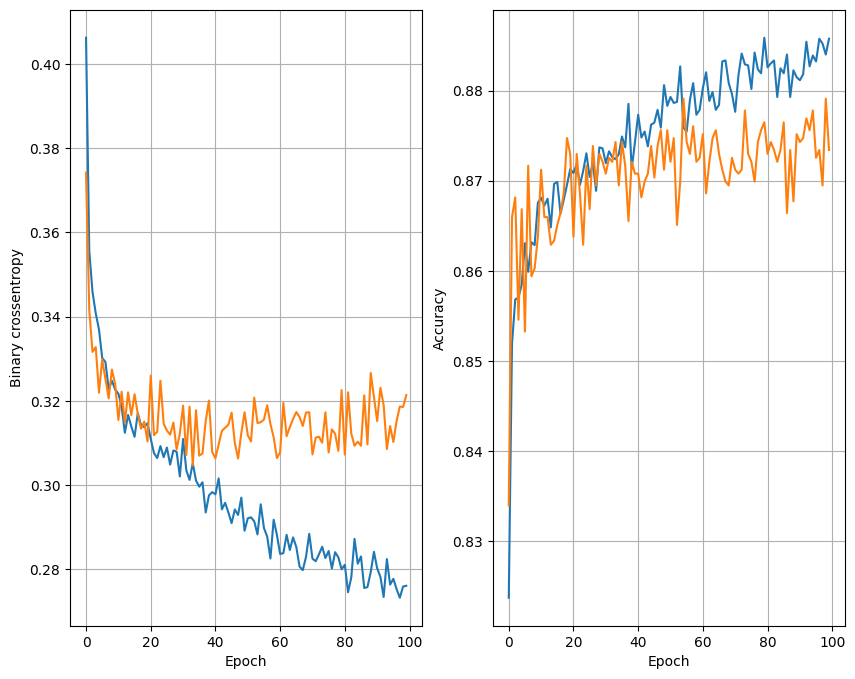

Validation Loss: 0.3500808775424957
64 nodes, dropout 0.2, lr 0.01, batch size 128


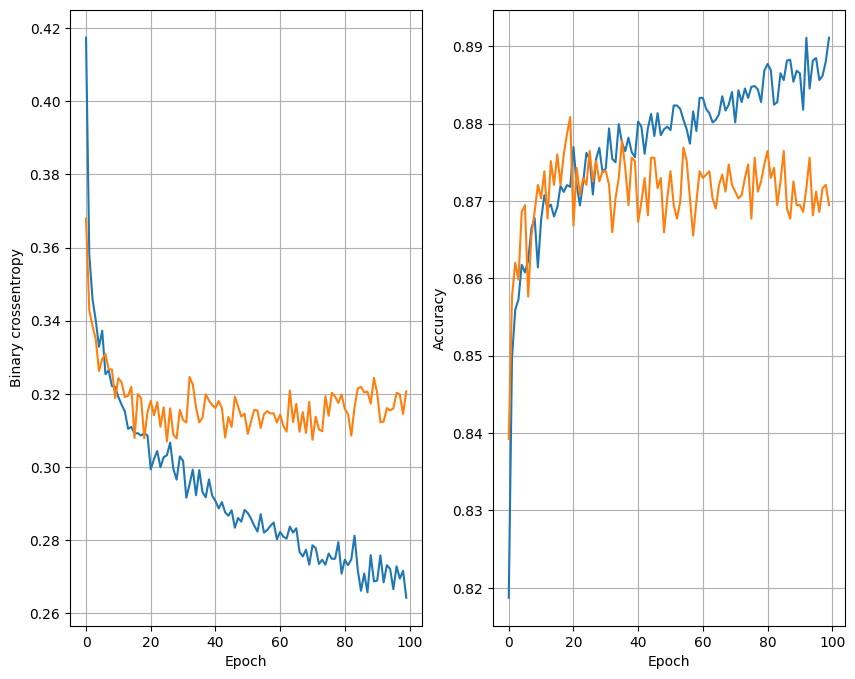

Validation Loss: 0.3394608795642853
64 nodes, dropout 0.2, lr 0.005, batch size 32


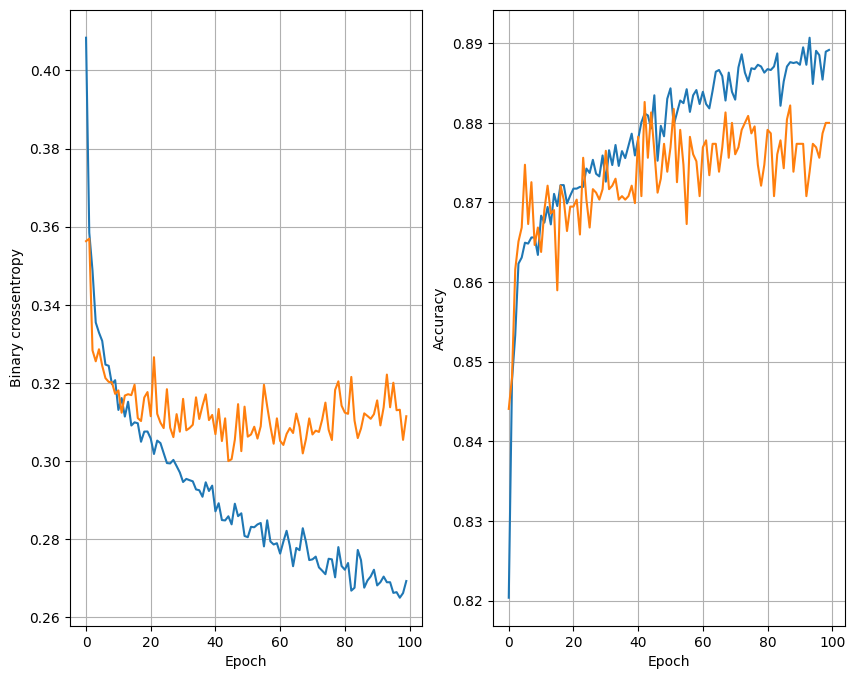

Validation Loss: 0.33221837878227234
64 nodes, dropout 0.2, lr 0.005, batch size 64


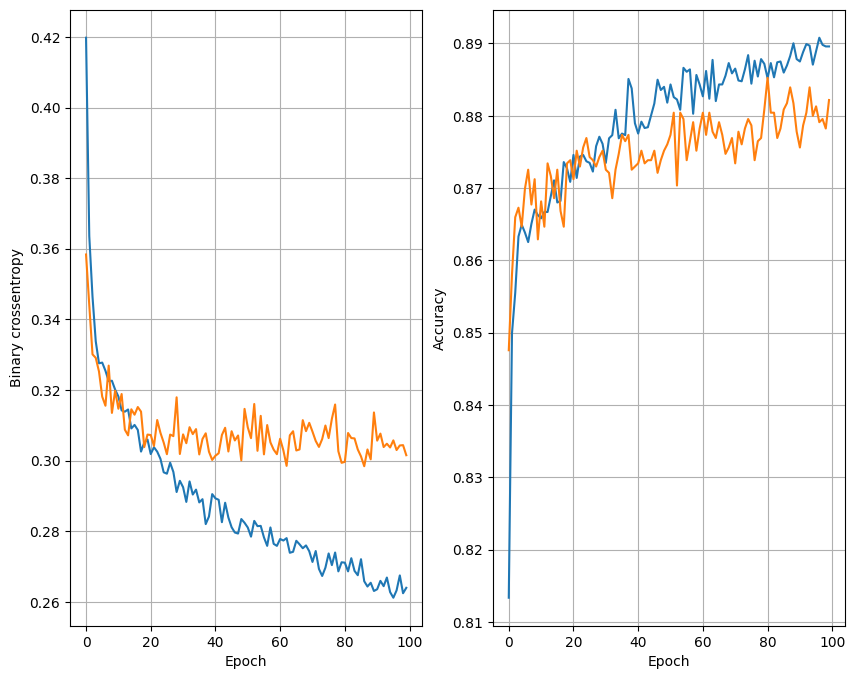

Validation Loss: 0.3283165991306305
64 nodes, dropout 0.2, lr 0.005, batch size 128


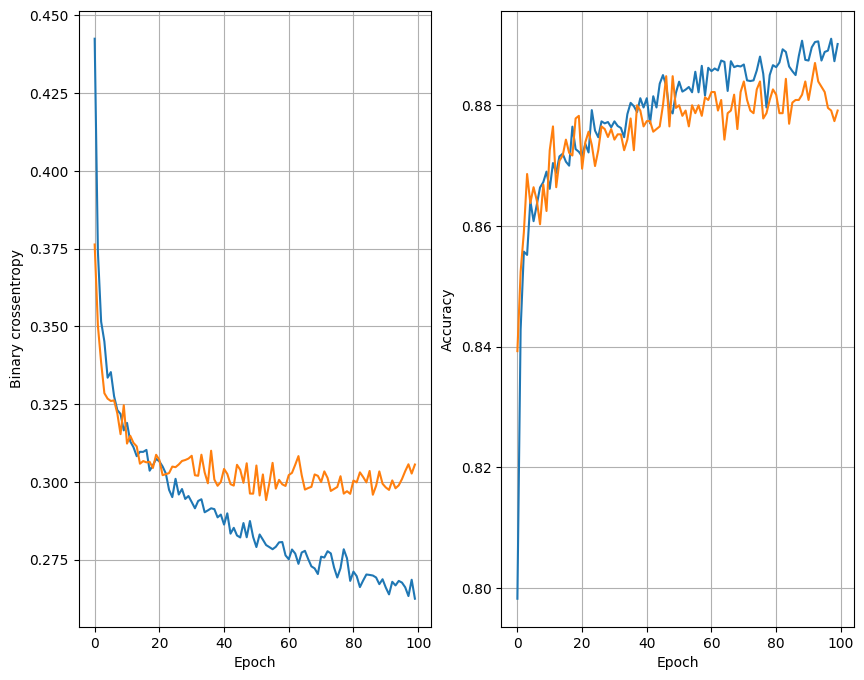

Validation Loss: 0.3251442611217499
64 nodes, dropout 0.2, lr 0.001, batch size 32


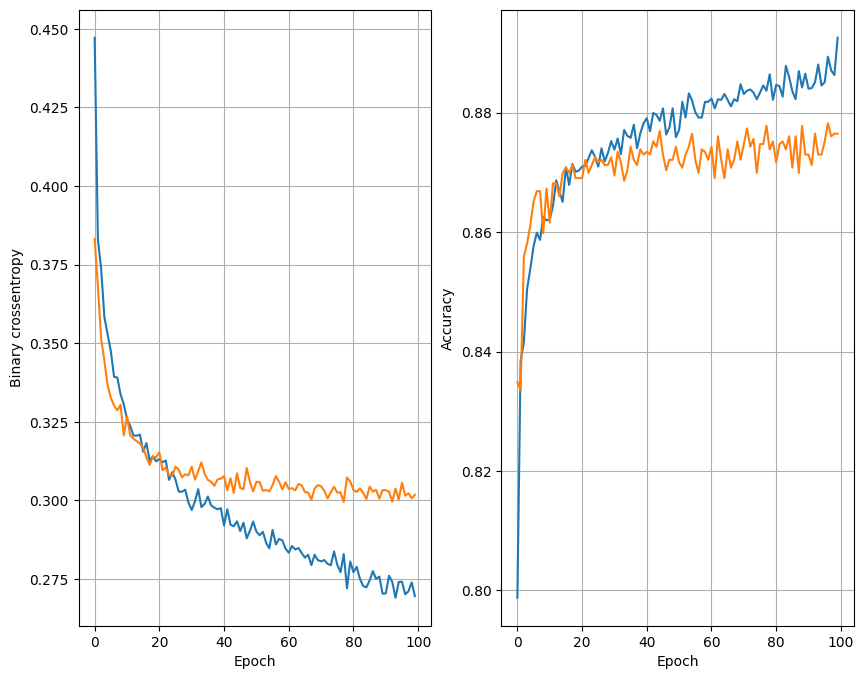

Validation Loss: 0.31893661618232727
64 nodes, dropout 0.2, lr 0.001, batch size 64


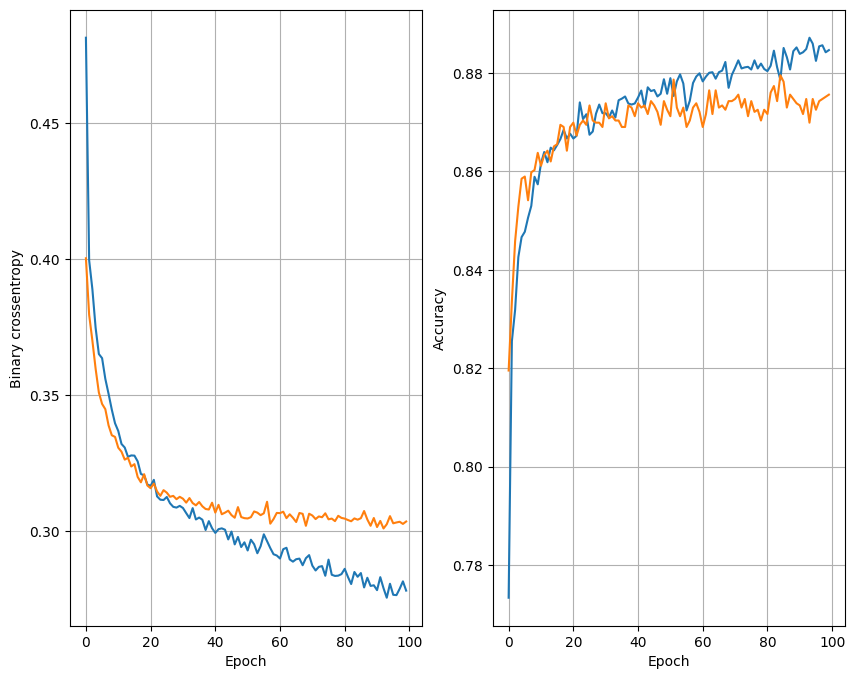

Validation Loss: 0.31862232089042664
64 nodes, dropout 0.2, lr 0.001, batch size 128


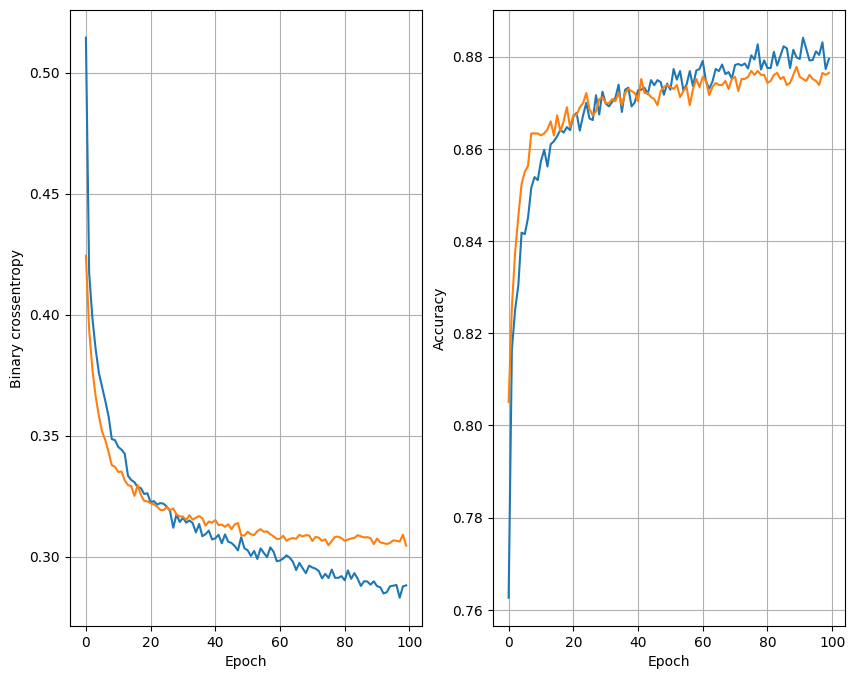

Validation Loss: 0.31742754578590393
Best model has validation loss: 0.3095831871032715


In [ ]:
# least_val_loss=float('inf')
# least_loss_model=None
# epochs=100
# for num_nodes in[16,32,64]:
#   for dropout_prob in[0,0.2]:
#     for lr in[0.01,0.005,0.001]:
#       for batch_size in[32,64,128]:
#         print(f"{num_nodes}nodes,dropout{dropout_prob},lr{lr},batch size{batch_size}")
#         model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
#         plot_history(history)
#         val_loss=model.evaluate(x_valid,y_valid)
least_val_loss = float('inf')  # Initialize the least validation loss
least_loss_model = None  # Initialize the best model
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                # Train the model with the current hyperparameters
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                # Plot the training history
                plot_history(history)

                # Evaluate on validation data
                val_loss = model.evaluate(x_valid, y_valid, verbose=0)

                # If val_loss is a list, take the first element (which is usually the loss)
                val_loss = val_loss[0] if isinstance(val_loss, list) else val_loss

                print(f"Validation Loss: {val_loss}")

                # Check if this is the best model
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model  # Save the model with the least validation loss
                    print("Updated least loss model.")

# Final Check
if least_loss_model is None:
    print("No model was trained successfully.")
else:
    print(f"Best model has validation loss: {least_val_loss}")



In [ ]:
# Debug least_loss_model
if least_loss_model is None:
    print("Error: least_loss_model is None. Check model initialization and training.")
else:
    print("least_loss_model is valid.")

# Debug training data
print("x_test shape:", x_test.shape)

# Proceed if the model is valid
if least_loss_model:
    y_pred = least_loss_model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
else:
    print("Model is not available for prediction.")



Error: least_loss_model is None. Check model initialization and training.
x_test shape: (3804, 10)
Model is not available for prediction.
